<a href="https://colab.research.google.com/github/toqatamer/Breast_cancer_detection/blob/main/Cancer_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning Project

This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.

Here is the refernce https://www.kaggle.com/datasets/reihanenamdari/breast-cancer

**Note: You can download it from here for excuting Dataset 2 section and procceed to the rest of the code**

##Description of Target Class 1##

**IA:** This stage likely represents an early stage of cancer, indicating a small tumor that has not spread beyond its original location.

**IIA:** This stage is also an early stage, but it may indicate a larger tumor or some involvement of nearby tissues.

**IIB:** This stage suggests further progression compared to IIA, indicating a larger tumor size or additional factors that classify it as a more advanced stage.

**IIIA:** This stage likely signifies a more advanced tumor that may have spread to nearby lymph nodes but not yet to distant sites.

**IV:** This stage usually indicates the most advanced or metastatic cancer, where the tumor has spread to distant organs or tissues.

**UNK Stage:** This label ("UNK Stage") stands for "Unknown Stage," meaning that the tumor stage is not specified or not available in the data.

**IIIC:** This stage suggests a more advanced tumor with significant lymph node involvement.

**IIIB:** Similar to IIIC, this stage indicates a higher level of tumor progression and lymph node involvement.

**IB:** This stage likely represents an early stage similar to IA but with some additional factors that classify it as a slightly more advanced category.

**IIINOS:** This label is less common and may not follow a standard staging convention. Without additional information, it's challenging to precisely interpret "IIINOS."

**Zero:** Indicates no Cancer

##Outlines##



1.   **Data Prepartion**


*   Cleaning (Handle missing - duplicates- inconsistiencies)
*   Features and Records enhancment
*   Feature Selection
*   Encoding
*   Check data balance
*  Scaling / Normalization
* Data Splitting
*  EDA

2.   **Model Training**
*   Model Selection
*   Cross Validation

3.   **Model Evaluation**
*   Evaluation Metrics
*   Feature Importance
*   Preformance Metrics










In [ ]:
#from IPython.display import Image
#Image(filename='Important.png')

##Importing Libraries##

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn import tree
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##Data Scrapping##

In [ ]:
import pandas as pd
import requests
from io import BytesIO

In [ ]:
webpage_url = 'https://zenodo.org/records/6571110'
response = requests.get(webpage_url)

In [ ]:
response

<Response [200]>

In [ ]:
if response.status_code == 200:
    html_content = response.text
    link_start = html_content.find('<a href="') + len('<a href="')
    link_end = html_content.find('"', link_start)
    xlsx_link = html_content[link_start:link_end]
    xlsx_url = f'https://zenodo.org{xlsx_link}'
    xlsx_response = requests.get('https://zenodo.org/records/6571110/files/data.xlsx?download=1')
    if xlsx_response.status_code == 200:
        excel_content = BytesIO(xlsx_response.content)
        df = pd.read_excel(excel_content, engine='openpyxl')
        print(df)
    else:
        print('Failed to retrieve the XLSX file. Status code:', xlsx_response.status_code)
else:
    print('Failed. Status code:', response.status_code)

        Patient ID                  Race recode (White, Black, Other)     Sex  \
0             1505                                              White  Female   
1             5033                                              White  Female   
2             5508                                              White  Female   
3             6774                                              White  Female   
4             8605  Other (American Indian/AK Native, Asian/Pacifi...  Female   
...            ...                                                ...     ...   
446801    77803717                                              White  Female   
446802    77803842                                              White  Female   
446803    77803868                                            Unknown  Female   
446804    77803956                                              White  Female   
446805    77804110                                              White  Female   

        Year of diagnosis A

In [ ]:
# Save the DataFrame to a CSV file
df.to_csv('output.csv', index=False)

##DATASET 1##

dataset resulted from scrapping

In [ ]:
df = pd.read_csv("output.csv")

<ipython-input-2-630acdaaab53>:1: DtypeWarning: Columns (38,52,53,54,55,56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("output.csv")


In [ ]:
selected_columns = ['Age recode with <1 year olds','Race recode (White, Black, Other)','Marital status at diagnosis','Derived AJCC T, 7th ed (2010-2015)','Derived AJCC N, 7th ed (2010-2015)','Derived AJCC Stage Group, 7th ed (2010-2015)','Grade','SEER historic stage A (1973-2015)','Regional nodes examined (1988+)','Regional nodes positive (1988+)','CS tumor size (2004-2015)','ER Status Recode Breast Cancer (1990+)','PR Status Recode Breast Cancer (1990+)','Survival months','Vital status recode (study cutoff used)']
df = df[selected_columns]

In [ ]:
df.rename(columns={'Race recode (White, Black, Other)': 'Race ', 'Age recode with <1 year olds': 'Age','Marital status at diagnosis': 'Marital Status','Derived AJCC T, 7th ed (2010-2015)': 'T Stage ','Derived AJCC N, 7th ed (2010-2015)': 'N Stage','Derived AJCC Stage Group, 7th ed (2010-2015)': '6th Stage','Grade': 'Grade','SEER historic stage A (1973-2015)': 'A Stage','CS tumor size (2004-2015)': 'Tumor Size','ER Status Recode Breast Cancer (1990+)': 'Estrogen Status','PR Status Recode Breast Cancer (1990+)': 'Progesterone Status','Regional nodes examined (1988+)': 'Regional Node Examined','Regional nodes positive (1988+)':'Reginol Node Positive','Survival months':'Survival Months','Vital status recode (study cutoff used)':'Status'
}, inplace=True)

<ipython-input-4-394df4152f20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Race recode (White, Black, Other)': 'Race ', 'Age recode with <1 year olds': 'Age','Marital status at diagnosis': 'Marital Status','Derived AJCC T, 7th ed (2010-2015)': 'T Stage ','Derived AJCC N, 7th ed (2010-2015)': 'N Stage','Derived AJCC Stage Group, 7th ed (2010-2015)': '6th Stage','Grade': 'Grade','SEER historic stage A (1973-2015)': 'A Stage','CS tumor size (2004-2015)': 'Tumor Size','ER Status Recode Breast Cancer (1990+)': 'Estrogen Status','PR Status Recode Breast Cancer (1990+)': 'Progesterone Status','Regional nodes examined (1988+)': 'Regional Node Examined','Regional nodes positive (1988+)':'Reginol Node Positive','Survival months':'Survival Months','Vital status recode (study cutoff used)'

In [ ]:
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Regional Node Examined,Reginol Node Positive,Tumor Size,Estrogen Status,Progesterone Status,Survival Months,Status
0,60-64 years,White,Married (including common law),T2,N0,IIA,Moderately differentiated; Grade II,Localized,9,0,27,Positive,Positive,62,Alive
1,60-64 years,White,Married (including common law),T2,N0,IIA,Well differentiated; Grade I,Localized,0,98,25,Positive,Positive,80,Alive
2,85+ years,White,Widowed,T1b,N0,IA,Moderately differentiated; Grade II,Localized,0,98,6,Positive,Positive,73,Alive
3,60-64 years,White,Single (never married),T4d,N0,IIIB,Unknown,Distant,98,0,999,Positive,Positive,4,Dead
4,80-84 years,"Other (American Indian/AK Native, Asian/Pacifi...",Widowed,T3,N2a,IIIA,Moderately differentiated; Grade II,Regional,11,6,70,Positive,Positive,31,Dead


In [ ]:
df.shape

(446806, 15)

In [ ]:
df.duplicated().sum()

34063

##DATASET 2##

In [ ]:
data = pd.read_csv("SEER Breast Cancer Dataset .csv")

In [ ]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [ ]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Reginol Node Positive   4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

In [ ]:
data.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [ ]:
data.shape

(4024, 15)

##Concat Datasets##

In [ ]:
data_merged = pd.concat([df, data], axis=0, ignore_index=True)

In [ ]:
data_merged.shape

(450830, 15)

In [ ]:
data_merged.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Regional Node Examined,Reginol Node Positive,Tumor Size,Estrogen Status,Progesterone Status,Survival Months,Status
0,60-64 years,White,Married (including common law),T2,N0,IIA,Moderately differentiated; Grade II,Localized,9,0,27,Positive,Positive,62,Alive
1,60-64 years,White,Married (including common law),T2,N0,IIA,Well differentiated; Grade I,Localized,0,98,25,Positive,Positive,80,Alive
2,85+ years,White,Widowed,T1b,N0,IA,Moderately differentiated; Grade II,Localized,0,98,6,Positive,Positive,73,Alive
3,60-64 years,White,Single (never married),T4d,N0,IIIB,Unknown,Distant,98,0,999,Positive,Positive,4,Dead
4,80-84 years,"Other (American Indian/AK Native, Asian/Pacifi...",Widowed,T3,N2a,IIIA,Moderately differentiated; Grade II,Regional,11,6,70,Positive,Positive,31,Dead


In [ ]:
data_merged.dtypes  #some datatypes are in need for change, this will be applied later

Age                       object
Race                      object
Marital Status            object
T Stage                   object
N Stage                   object
6th Stage                 object
Grade                     object
A Stage                   object
Regional Node Examined     int64
Reginol Node Positive      int64
Tumor Size                object
Estrogen Status           object
Progesterone Status       object
Survival Months           object
Status                    object
dtype: object

In [ ]:
##data_merged.to_csv('final.csv', index=False)

##1. Data Pre-proccessing & Feature Engineering##

Checking Nulls

In [ ]:
data_merged.duplicated().sum()

34064

In [ ]:
data_merged =data_merged.drop_duplicates()

In [ ]:
data_merged.duplicated().sum()

0

Checking Duplicates

In [ ]:
data_merged.isna().sum()

Age                         0
Race                        0
Marital Status              0
T Stage                   433
N Stage                   433
6th Stage                 433
Grade                       0
A Stage                     0
Regional Node Examined      0
Reginol Node Positive       0
Tumor Size                  0
Estrogen Status             0
Progesterone Status         0
Survival Months             0
Status                      0
dtype: int64

Format the Age coulumn - so we will be having one format after merging the datasets

In [ ]:
import re
def extract_numeric(age_string):
    numeric_part = re.findall(r'\d+', age_string)
    if numeric_part:
        return int(numeric_part[0])
    else:
        return None
data_merged['Age'] = data_merged['Age'].apply(lambda x: extract_numeric(str(x)))

Handling T Stage class missing

In [ ]:
data_merged['T Stage '].mode()

0    T1c
Name: T Stage , dtype: object

In [ ]:
data_merged['T Stage '].fillna(data_merged['T Stage '].mode()[0], inplace=True)
print(data_merged['T Stage '].isna().sum())


0


In [ ]:
T_counts = data_merged['T Stage '].value_counts()
T_counts

T1c         116662
T2          108618
T1b          58756
Blank(s)     42477
T1a          24776
T3           22905
TX           15695
T4b           8598
T1mic         6903
T4d           4441
T4a           2041
T1            1602
T0            1114
T1NOS          644
Tis            522
T4c            455
T4NOS          455
T4             102
Name: T Stage , dtype: int64

In [ ]:
Mode= data_merged['T Stage '].mode()[0]
data_merged['T Stage '].replace('Blank(s)', Mode, inplace=True)

In [ ]:
T_counts = data_merged['T Stage '].value_counts()
T_counts

T1c      159139
T2       108618
T1b       58756
T1a       24776
T3        22905
TX        15695
T4b        8598
T1mic      6903
T4d        4441
T4a        2041
T1         1602
T0         1114
T1NOS       644
Tis         522
T4c         455
T4NOS       455
T4          102
Name: T Stage , dtype: int64

Handling N Stage missing

In [ ]:
data_merged['N Stage'].mode()

0    N0
Name: N Stage, dtype: object

In [ ]:
data_merged['N Stage'].fillna(data_merged['N Stage'].mode()[0], inplace=True)
print(data_merged['N Stage'].isna().sum())

0


In [ ]:
Mode= data_merged['N Stage'].mode()[0]
data_merged['N Stage'].replace('Blank(s)', Mode, inplace=True)

Handling 6TH Stage missings

In [ ]:
data_merged['6th Stage'].mode()

0    IA
Name: 6th Stage, dtype: object

In [ ]:
data_merged['6th Stage'].fillna(data_merged['6th Stage'].mode()[0], inplace=True)
print(data_merged['6th Stage'].isna().sum())

0


In [ ]:
Mode= data_merged['6th Stage'].mode()[0]

# Replace 'blanks' with the mode
data_merged['6th Stage'].replace('Blank(s)', Mode, inplace=True)

In [ ]:
Stages_counts = data_merged['6th Stage'].value_counts()
Stages_counts

IA           212477
IIA           79033
IIB           40689
IIIA          23028
IV            21335
UNK Stage     13358
IIIC           9665
IIIB           8070
IB             7936
IIINOS          653
0               522
Name: 6th Stage, dtype: int64

Handling Grade Missings

In [ ]:
data_merged['Grade'].mode()

0    Moderately differentiated; Grade II
Name: Grade, dtype: object

In [ ]:
data_merged['Grade'].fillna(data_merged['Grade'].mode()[0], inplace=True)
print(data_merged['Grade'].isna().sum())

0


In [ ]:
Mode= data_merged['Grade'].mode()[0]
data_merged['Grade'].replace('Blank(s)', Mode, inplace=True)

Handle BLANKS records (its a text not just a null) in A Stage

In [ ]:
Mode= data_merged['A Stage'].mode()[0]

# Replace 'blanks' with the mode
data_merged['A Stage'].replace('Blank(s)', Mode, inplace=True)

In [ ]:
data_merged.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
Grade                     0
A Stage                   0
Regional Node Examined    0
Reginol Node Positive     0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Survival Months           0
Status                    0
dtype: int64

Changing Columns data types for a need

In [ ]:
data_merged['Tumor Size'] = pd.to_numeric(data_merged['Tumor Size'], errors='coerce')

In [ ]:
print(data_merged['Tumor Size'].isna().sum())

42477


In [ ]:
mean_value = data_merged['Tumor Size'].mean()
data_merged['Tumor Size'].fillna(mean_value, inplace=True)

----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
data_merged['Survival Months'] = pd.to_numeric(data_merged['Survival Months'], errors='coerce')

In [ ]:
print(data_merged['Survival Months'].isna().sum())

252


In [ ]:
mean_value = data_merged['Survival Months'].mean()
data_merged['Survival Months'].fillna(mean_value, inplace=True)

Renaming Column

In [ ]:
data_merged.rename(columns={'6th Stage': 'Tumor_stage'}, inplace=True)


Changing Column Categories

In [ ]:
data_merged['Status'] = data_merged['Status'].replace({'Alive': 'Survived', 'Dead': 'Not Survived'})

Splitting Columns - Feature extraction

In [ ]:
data_merged[['Differentiation', 'Grade']] = data_merged['Grade'].str.split('; ', n=1, expand=True)

Remove extras in records - Regulate records

In [ ]:
data_merged['Marital Status'] = data_merged['Marital Status'].str.replace(r'\([^)]*\)', '', regex=True)

In [ ]:
data_merged['Race '] = data_merged['Race '].str.replace(r'\([^)]*\)', '', regex=True)

Drop non needed columns

In [ ]:
data_merged.drop('Differentiation', axis=1, inplace=True)

Balance

In [ ]:
T_counts = data_merged['T Stage '].value_counts()
T_counts

T1c      159139
T2       108618
T1b       58756
T1a       24776
T3        22905
TX        15695
T4b        8598
T1mic      6903
T4d        4441
T4a        2041
T1         1602
T0         1114
T1NOS       644
Tis         522
T4c         455
T4NOS       455
T4          102
Name: T Stage , dtype: int64

In [ ]:
N_counts = data_merged['N Stage'].value_counts()
N_counts

N0          194134
N0(i-)       85413
N1a          44246
N1           23982
N2a          16195
N1mi         14838
NX           10259
N3a           8024
N0(i+)        7610
N1NOS         3513
N2NOS         2078
N3c           1730
N3b           1606
N2             820
N3NOS          618
N0(mol-)       523
N3             472
N2b            376
N1c            172
N1b            109
N0(mol+)        48
Name: N Stage, dtype: int64

In [ ]:
Stages_counts = data_merged['Tumor_stage'].value_counts()
Stages_counts

IA           212477
IIA           79033
IIB           40689
IIIA          23028
IV            21335
UNK Stage     13358
IIIC           9665
IIIB           8070
IB             7936
IIINOS          653
0               522
Name: Tumor_stage, dtype: int64

In [ ]:
Grade = data_merged['Grade'].value_counts()
Grade

Grade II                170550
Grade III               128395
Grade I                  86126
anaplastic; Grade IV      1500
Name: Grade, dtype: int64

In [ ]:
A_counts = data_merged['A Stage'].value_counts()
A_counts

Localized    276837
Regional     107051
Distant       27120
Unstaged       5758
Name: A Stage, dtype: int64

In [ ]:
E_counts = data_merged['Estrogen Status'].value_counts()
E_counts

Positive      329991
Negative       69803
Unknown        16791
Borderline       181
Name: Estrogen Status, dtype: int64

In [ ]:
P_counts = data_merged['Progesterone Status'].value_counts()
P_counts

Positive      283467
Negative      114556
Unknown        18235
Borderline       508
Name: Progesterone Status, dtype: int64

In [ ]:
status_counts = data_merged['Status'].value_counts()
status_counts

Survived        359741
Not Survived     57025
Name: Status, dtype: int64

Checking Inconsistiencies

In [ ]:
data_merged.describe()

,Age,Regional Node Examined,Reginol Node Positive,Tumor Size,Survival Months
count,416766.000000,416766.000000,416766.000000,416766.000000,416766.000000
mean,59.604699,8.907212,18.339970,85.198812,37.178131
std,13.596471,19.055526,37.019744,225.864894,23.705634
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,50.000000,1.000000,0.000000,12.000000,17.000000
50%,60.000000,3.000000,0.000000,21.000000,35.000000
75%,70.000000,8.000000,4.000000,45.000000,57.000000
max,85.000000,99.000000,99.000000,999.000000,107.000000


**For TARGET CLASS ONE**

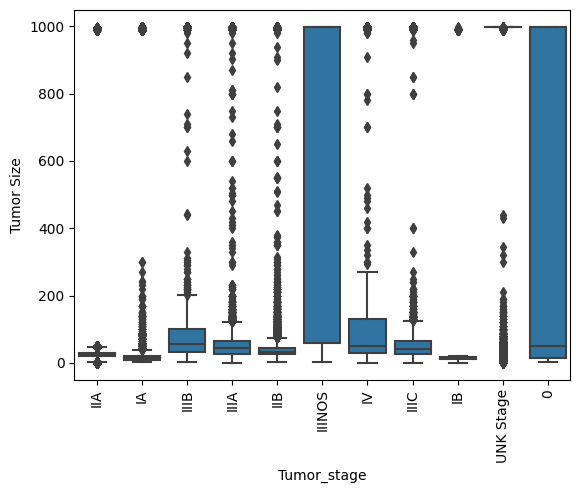

In [ ]:
base_color = sb.color_palette()[0]
sb.boxplot(data=data_merged, x='Tumor_stage', y='Tumor Size', color=base_color)
plt.xticks(rotation=90);

In [ ]:
data_merged.dtypes

Age                         int64
Race                       object
Marital Status             object
T Stage                    object
N Stage                    object
Tumor_stage                object
Grade                      object
A Stage                    object
Regional Node Examined      int64
Reginol Node Positive       int64
Tumor Size                float64
Estrogen Status            object
Progesterone Status        object
Survival Months           float64
Status                     object
dtype: object

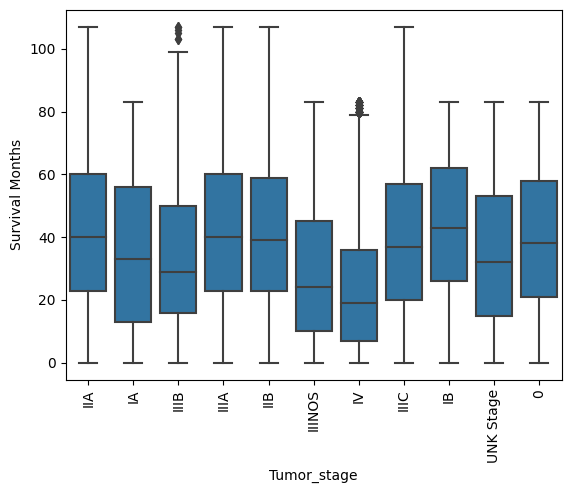

In [ ]:
base_color = sb.color_palette()[0]
sb.boxplot(data=data_merged, x='Tumor_stage', y='Survival Months', color=base_color)
plt.xticks(rotation=90);

**For TARGET CLASS TWO**

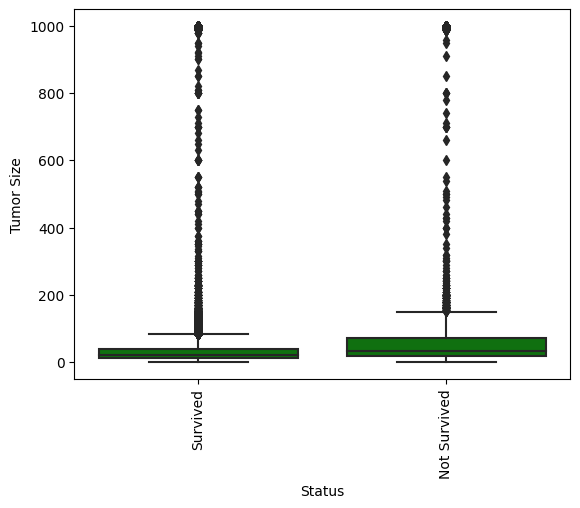

In [ ]:
base_color = 'green'
sb.boxplot(data=data_merged, x='Status', y='Tumor Size', color=base_color)
plt.xticks(rotation=90);

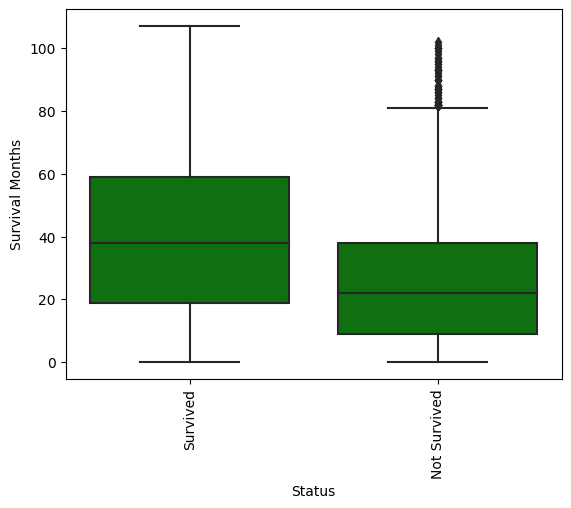

In [ ]:
base_color = 'green'
sb.boxplot(data=data_merged, x='Status', y='Survival Months', color=base_color)
plt.xticks(rotation=90);

Checking Spelling mistakes

In [ ]:
 !pip install pyspellchecker

In [ ]:
from spellchecker import SpellChecker

In [ ]:
text_columns = data.select_dtypes(include=['object']).columns
text_columns

Index(['Race ', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'Grade',
       'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status'],
      dtype='object')

In [ ]:
def count_spell_mistakes(column):
    spell = SpellChecker()
    return column.apply(lambda x: len(spell.unknown(str(x).split())))

mistake_count = count_spell_mistakes(data)
print(mistake_count)

##we can ignore the numerical columns

Age                        7
Race                       9
Marital Status             8
T Stage                    8
N Stage                   10
6th Stage                 11
Grade                      7
A Stage                    6
Tumor Size                 7
Estrogen Status            6
Progesterone Status        6
Regional Node Examined     7
Reginol Node Positive      8
Survival Months            7
Status                     6
dtype: int64


Feature Selection by Correlation Analysis

This is Just for understandiing the data. As the target classes are catergoical we will be using another method.

In [ ]:
correlation_matrix = data_merged.corr()
correlation_matrix

<ipython-input-71-70d997ae8551>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_merged.corr()


,Age,Regional Node Examined,Reginol Node Positive,Tumor Size,Survival Months
Age,1.000000,-0.063576,0.159748,0.011893,-0.067082
Regional Node Examined,-0.063576,1.000000,0.247466,0.198843,-0.058563
Reginol Node Positive,0.159748,0.247466,1.000000,0.292402,-0.182502
Tumor Size,0.011893,0.198843,0.292402,1.000000,-0.081524
Survival Months,-0.067082,-0.058563,-0.182502,-0.081524,1.000000


<ipython-input-72-abb522cb341c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_merged.corr()


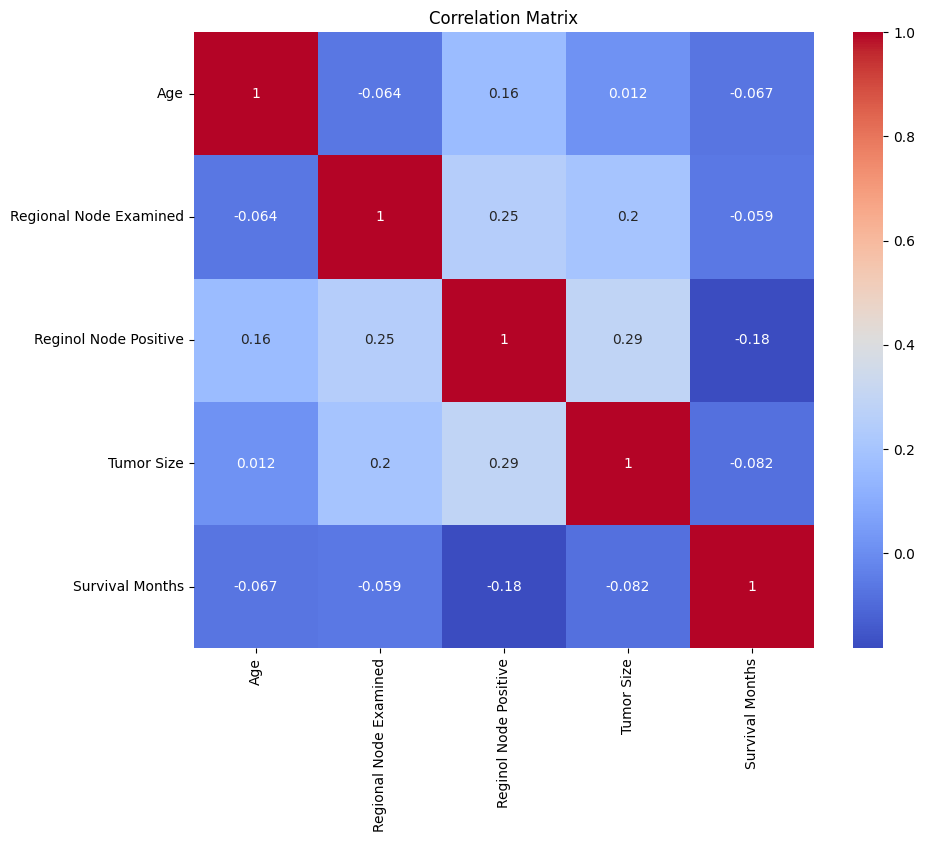

In [ ]:
correlation_matrix = data_merged.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Checking Balance of TARGET CLASS ONE

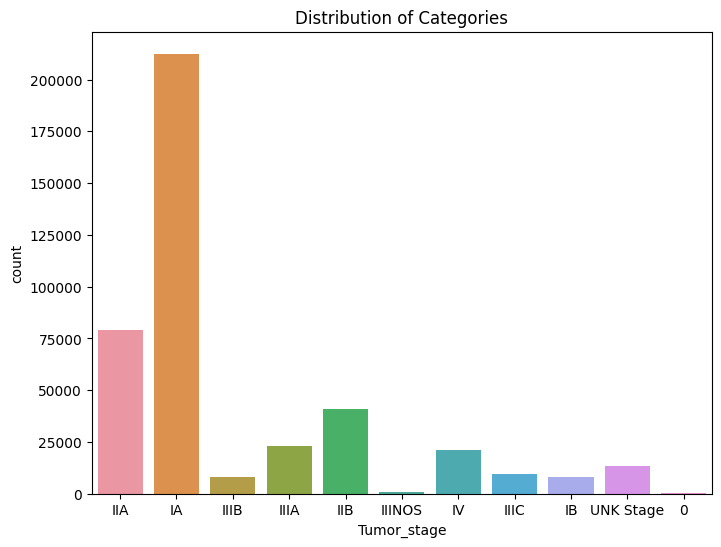

In [ ]:
plt.figure(figsize=(8, 6))
sb.countplot(data=data_merged, x='Tumor_stage')
plt.title('Distribution of Categories')
plt.show()

Checking Balance of TARGET CLASS TWO

In [ ]:
Status_counts = data_merged['Status'].value_counts()
Status_counts

Survived        359741
Not Survived     57025
Name: Status, dtype: int64

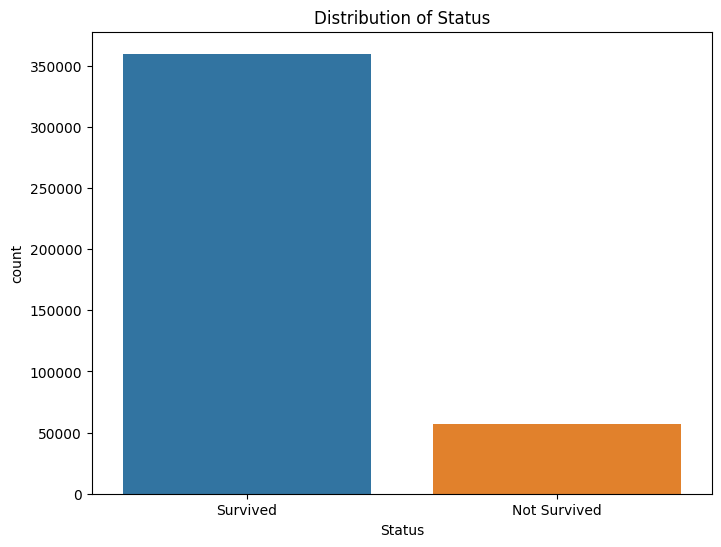

In [ ]:
plt.figure(figsize=(8, 6))
sb.countplot(data=data_merged, x='Status')
plt.title('Distribution of Status')
plt.show()

**PLS Check the EDA before running the below cells, to prevent errors after dropping some columns**

**Data Spliting with Train Test split**

In [ ]:
from sklearn.model_selection import train_test_split
#X = data_merged.drop('Tumor_stage',axis=1)
#y = data_merged['Tumor_stage']

In [ ]:
#In case you are trying TARGET CLASS 2


X = data_merged.drop('Status',axis=1)
y = data_merged['Status']

Encoding by getting Data Dummies

In [ ]:
categoryStrFeatures = [col for col in data_merged.columns if data_merged[col].dtypes == 'O']
categoryStrFeatures

['Race ',
 'Marital Status',
 'T Stage ',
 'N Stage',
 'Tumor_stage',
 'Grade',
 'A Stage',
 'Estrogen Status',
 'Progesterone Status',
 'Status']

In [ ]:
data_merged[categoryStrFeatures].describe()

,Race,Marital Status,T Stage,N Stage,Tumor_stage,Grade,A Stage,Estrogen Status,Progesterone Status,Status
count,416766,416766,416766,416766,416766,386571,416766,416766,416766,416766
unique,4,7,17,21,11,4,4,4,4,2
top,White,Married,T1c,N0,IA,Grade II,Localized,Positive,Positive,Survived
freq,324019,216095,159139,194134,212477,170550,276837,329991,283467,359741


In [ ]:
X= pd.get_dummies(X)
X

,Age,Regional Node Examined,Reginol Node Positive,Tumor Size,Survival Months,Race _Black,Race _Other,Race _Unknown,Race _White,Marital Status_Divorced,...,A Stage_Regional,A Stage_Unstaged,Estrogen Status_Borderline,Estrogen Status_Negative,Estrogen Status_Positive,Estrogen Status_Unknown,Progesterone Status_Borderline,Progesterone Status_Negative,Progesterone Status_Positive,Progesterone Status_Unknown
0,60,9,0,27.0,62.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,60,0,98,25.0,80.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,85,0,98,6.0,73.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,60,98,0,999.0,4.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,80,11,6,70.0,31.0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450825,52,19,1,10.0,107.0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
450826,53,13,5,9.0,107.0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
450827,53,4,2,9.0,107.0,0,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
450828,60,14,2,9.0,107.0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Normalizing Numerical Features

In [ ]:
numerical_features = data_merged.select_dtypes(include=['int', 'float']).columns
numerical_features

Index(['Age', 'Regional Node Examined', 'Reginol Node Positive', 'Tumor Size',
       'Survival Months'],
      dtype='object')

In [ ]:
#Just for training set
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()
#log.fit(X_train[['Age','Tumor Size','Regional Node Examined', 'Reginol Node Positive', 'Survival Months']])


In [ ]:
X_train.head()

,Age,Regional Node Examined,Reginol Node Positive,Tumor Size,Survival Months,Race _Black,Race _Other,Race _Unknown,Race _White,Marital Status_Divorced,...,A Stage_Regional,A Stage_Unstaged,Estrogen Status_Borderline,Estrogen Status_Negative,Estrogen Status_Positive,Estrogen Status_Unknown,Progesterone Status_Borderline,Progesterone Status_Negative,Progesterone Status_Positive,Progesterone Status_Unknown
96784,50,10,0,37.0,61.0,0,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
290484,65,12,0,21.0,27.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
183727,80,3,0,7.0,53.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
447352,48,4,1,30.0,49.0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
64832,50,2,0,10.0,70.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
y_train.head()

96784     Survived
290484    Survived
183727    Survived
447352    Survived
64832     Survived
Name: Status, dtype: object

##EDA

ay error expected 3alshn l visulas 3ala asas l data l adema, wehna delw2ty bnwgeh diversity gher 3adya bel mara. beraha 3alehom argoko

Trends, Insights, Outliers

**All Data Distrbution**

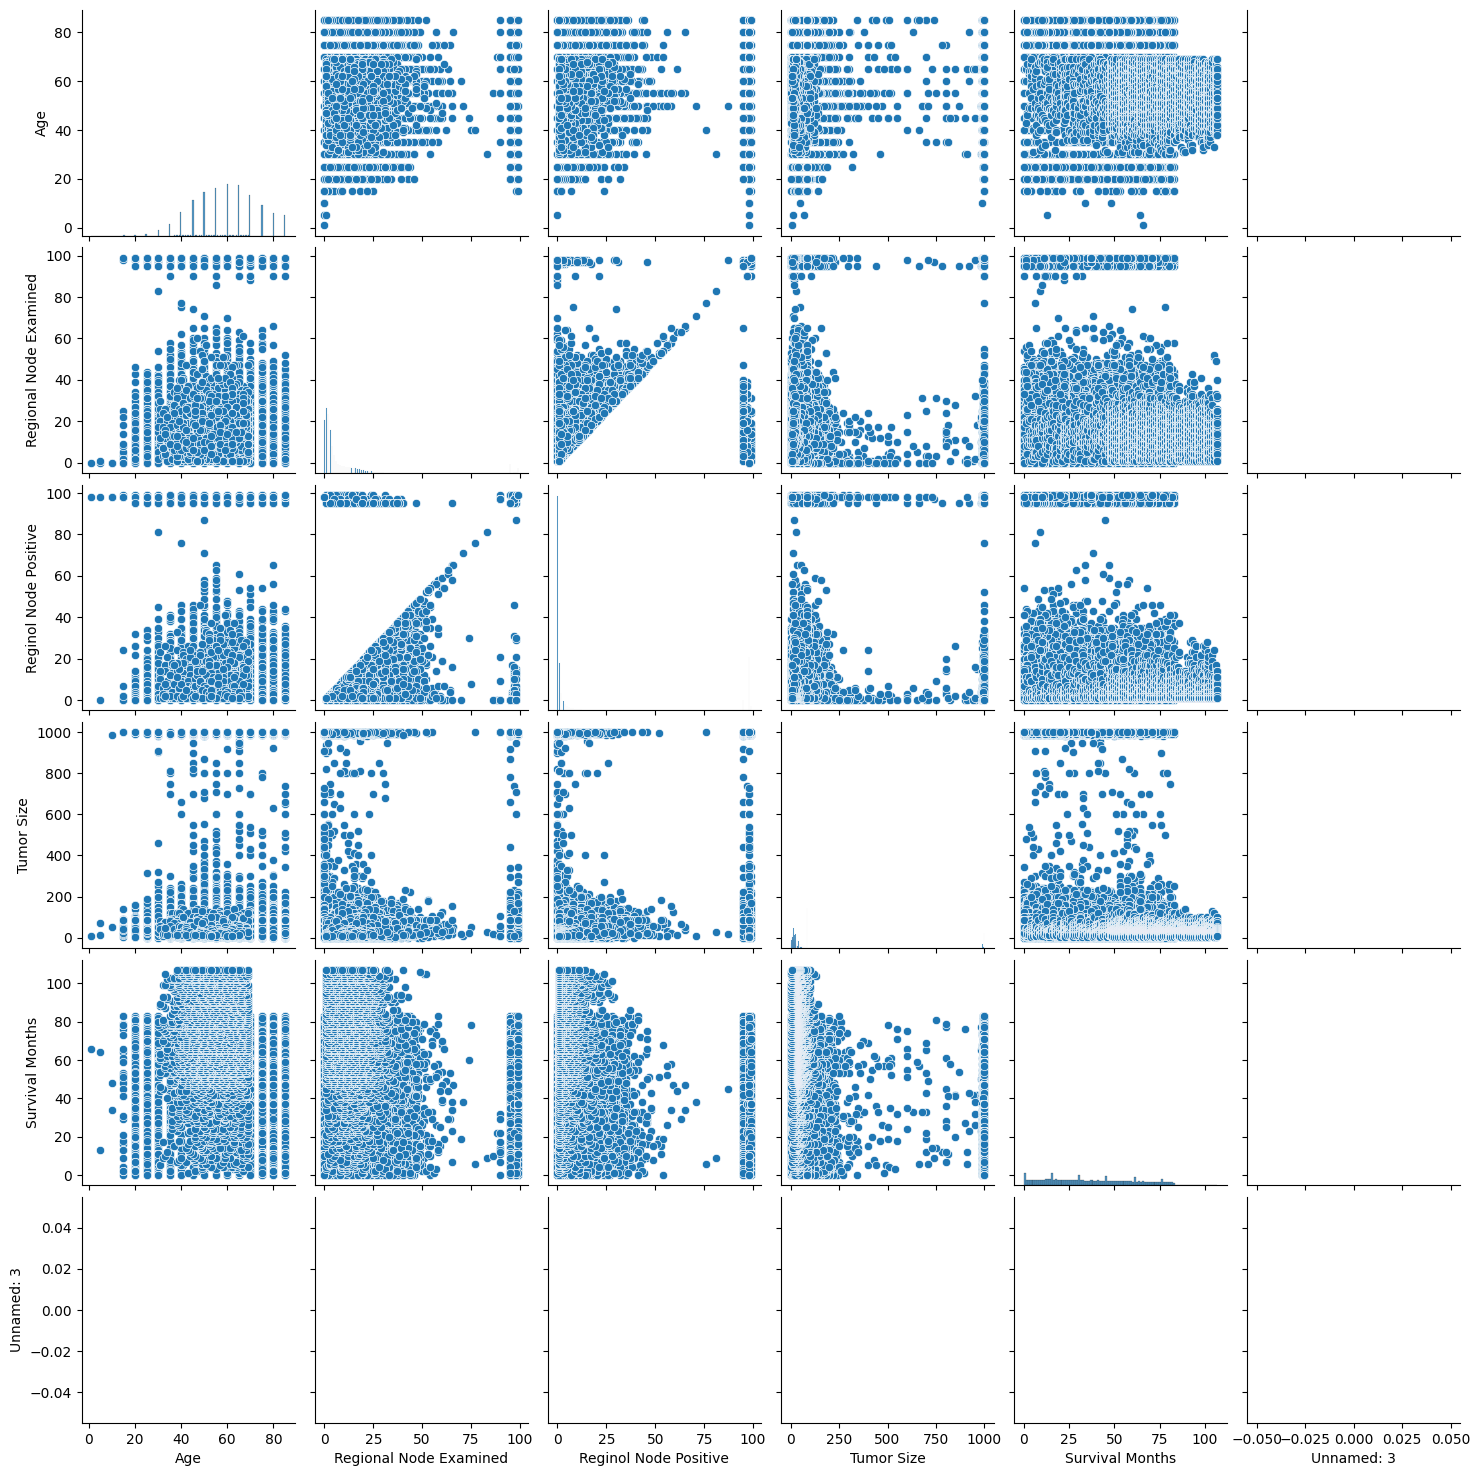

In [ ]:
sb.pairplot(data_merged)

**Qualitive vs Qualitive**

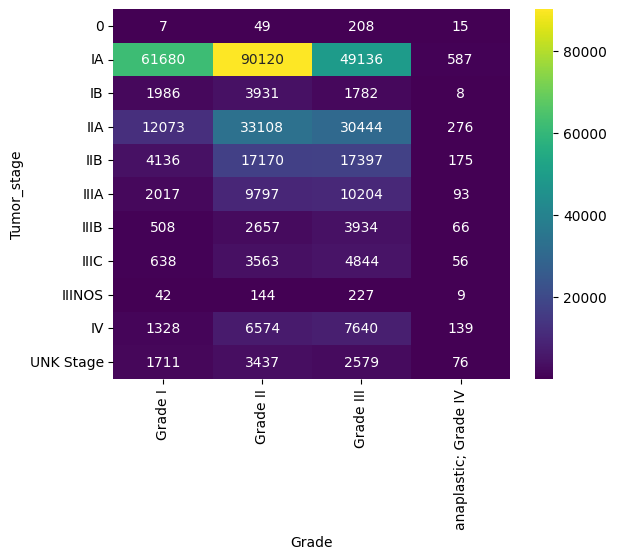

In [ ]:
crosstab = pd.crosstab(data_merged['Tumor_stage'], data_merged['Grade'])
sb.heatmap(crosstab, annot=True, cmap='viridis', fmt='d')
plt.show()

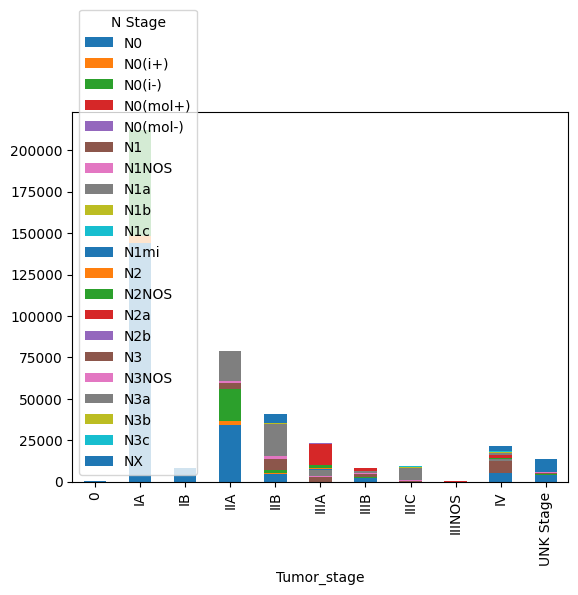

In [ ]:
pd.crosstab(data_merged['Tumor_stage'], data_merged['N Stage']).plot(kind='bar', stacked=True)
plt.show()

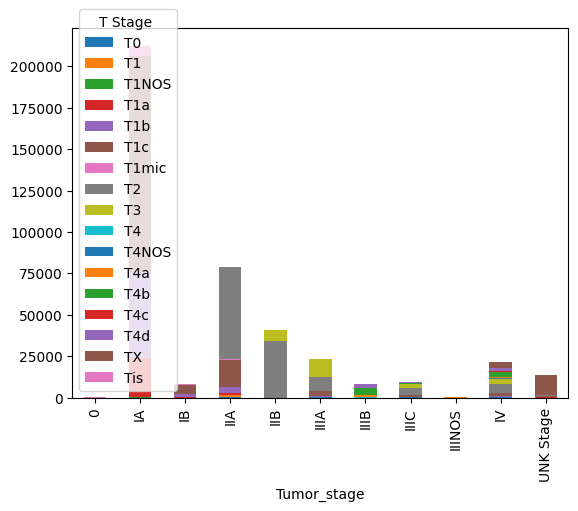

In [ ]:
pd.crosstab(data_merged['Tumor_stage'], data_merged['T Stage ']).plot(kind='bar', stacked=True)
plt.show()

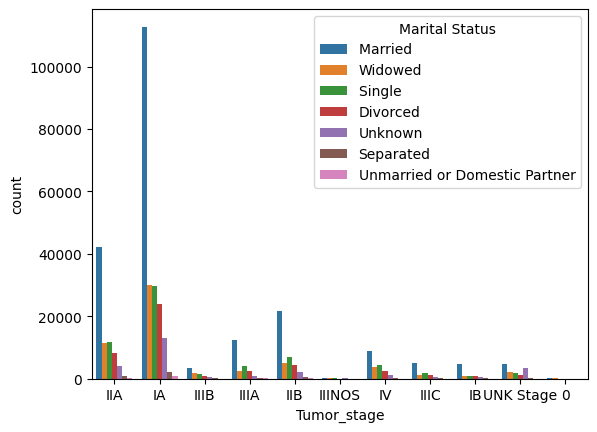

In [ ]:
sb.countplot(x='Tumor_stage', hue='Marital Status', data=data_merged)
plt.show()

**Qualitive vs Quantitive**

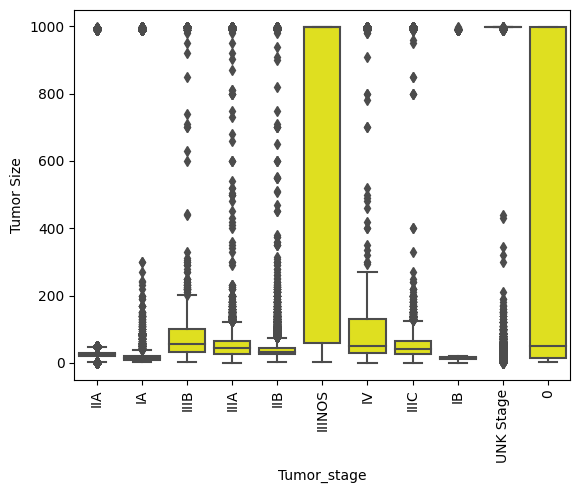

In [ ]:
base_color = 'yellow'
sb.boxplot(data=data_merged, x='Tumor_stage', y='Tumor Size', color=base_color)
plt.xticks(rotation=90);

In [ ]:
#base_color = 'Green'
#sb.boxplot(data=data_merged, x='Tumor_stage', y='Regional Node Examined', color=base_color)
#plt.xticks(rotation=90);

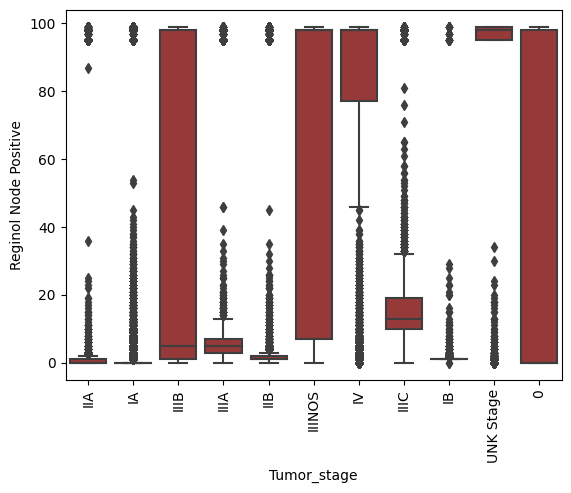

In [ ]:
base_color = 'brown'
sb.boxplot(data=data_merged, x='Tumor_stage', y='Reginol Node Positive', color=base_color)
plt.xticks(rotation=90);

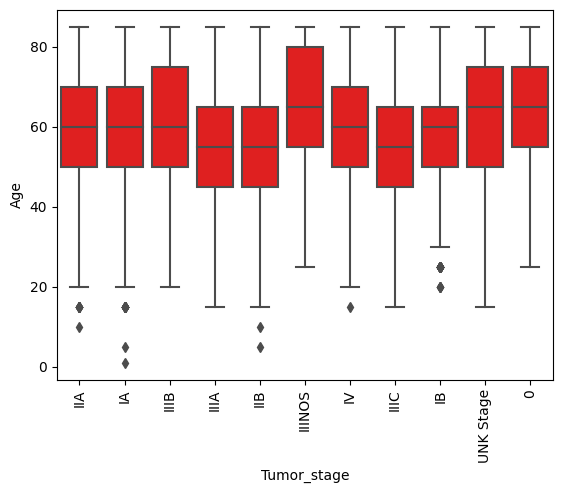

In [ ]:
base_color = 'red'
sb.boxplot(data=data_merged, x='Tumor_stage', y='Age', color=base_color)
plt.xticks(rotation=90);

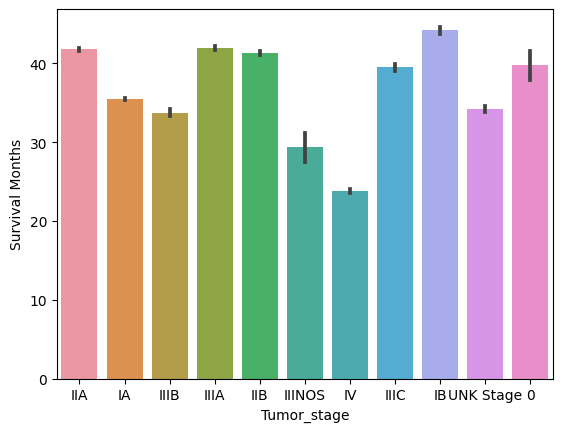

In [ ]:
sb.barplot(x='Tumor_stage', y='Survival Months', data=data_merged)
plt.show()

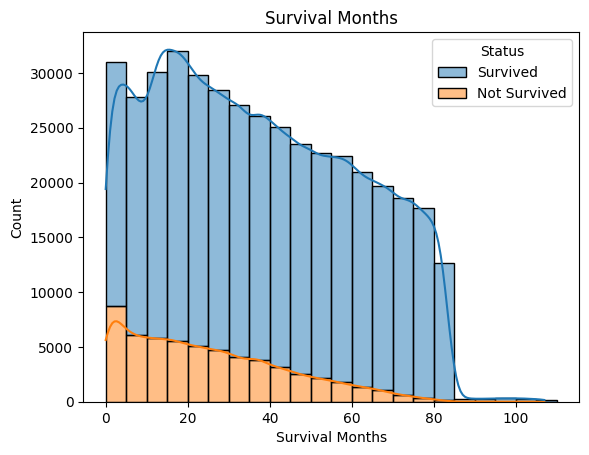

In [ ]:
sb.histplot(data=data_merged,x='Survival Months',kde=True,binwidth=5,hue='Status',stat='count',multiple='stack')
plt.title("Survival Months")
plt.show()

**Qaultitive**

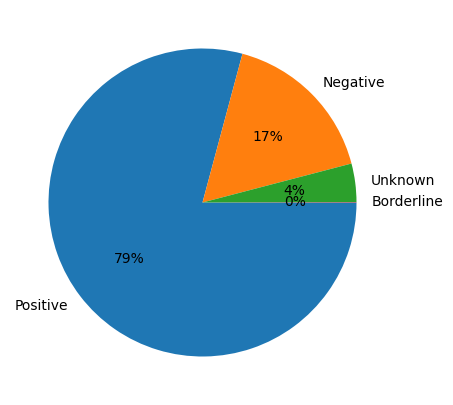

In [ ]:
plt.figure(figsize = [5, 5])
gen_percentage = data_merged['Estrogen Status'].value_counts(normalize=True)
plt.pie(gen_percentage, labels = gen_percentage.index, counterclock = False,autopct='%1.0f%%');

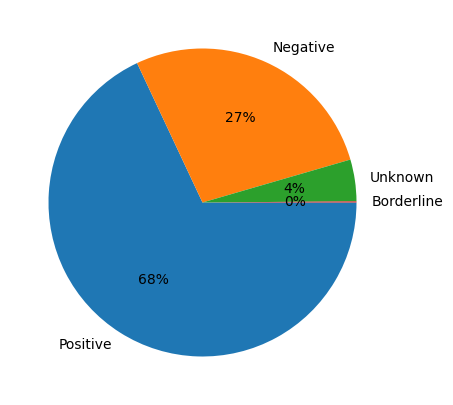

In [ ]:
plt.figure(figsize = [5, 5])
gen_percentage = data_merged['Progesterone Status'].value_counts(normalize=True)
plt.pie(gen_percentage, labels = gen_percentage.index, counterclock = False,autopct='%1.0f%%');

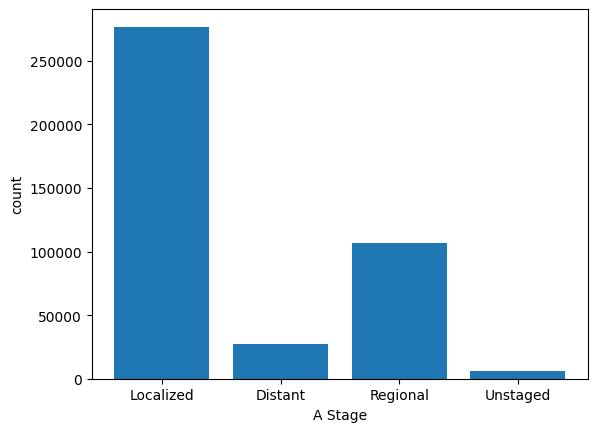

In [ ]:
x = data_merged['A Stage'].value_counts(sort=False).index
y = data_merged['A Stage'].value_counts(sort=False)

plt.bar(x, y)
plt.xlabel('A Stage')
plt.ylabel('count')
plt.show()

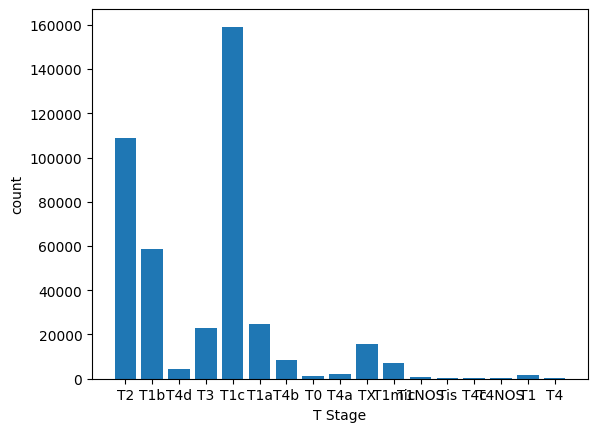

In [ ]:
x = data_merged['T Stage '].value_counts(sort=False).index
y = data_merged['T Stage '].value_counts(sort=False)

plt.bar(x, y)
plt.xlabel('T Stage')
plt.ylabel('count')
plt.show()

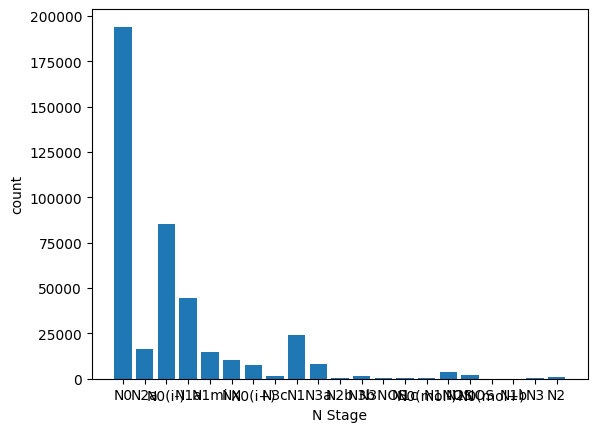

In [ ]:
x = data_merged['N Stage'].value_counts(sort=False).index
y = data_merged['N Stage'].value_counts(sort=False)

plt.bar(x, y)
plt.xlabel('N Stage')
plt.ylabel('count')
plt.show()

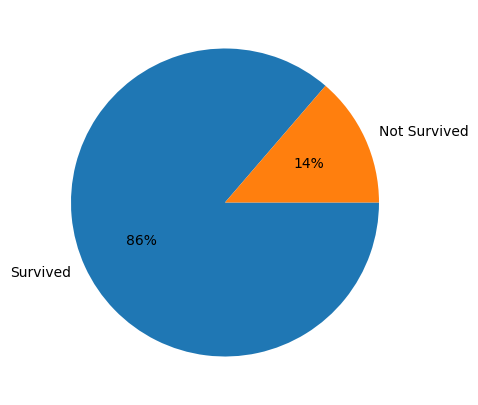

In [ ]:
plt.figure(figsize = [5, 5])
gen_percentage = data_merged['Status'].value_counts(normalize=True)
plt.pie(gen_percentage, labels = gen_percentage.index, counterclock = False,autopct='%1.0f%%');

**Qantitive**

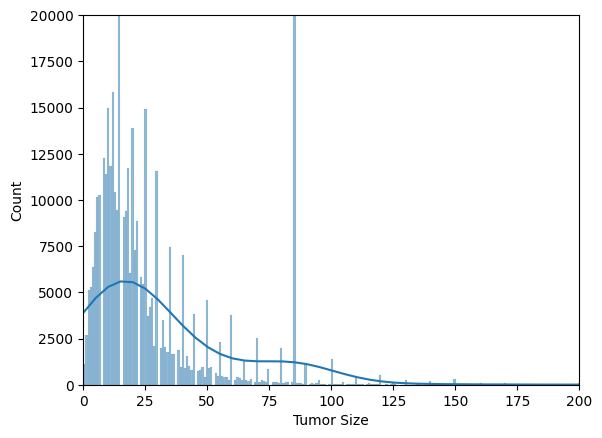

In [ ]:
sb.histplot(data_merged['Tumor Size'], kde=True)
plt.xlim(0, 200)
plt.ylim(0, 20000)
plt.show()

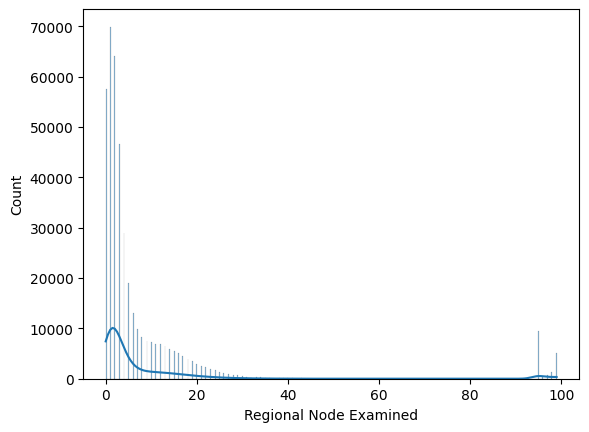

In [ ]:
sb.histplot(data_merged['Regional Node Examined'], kde=True);

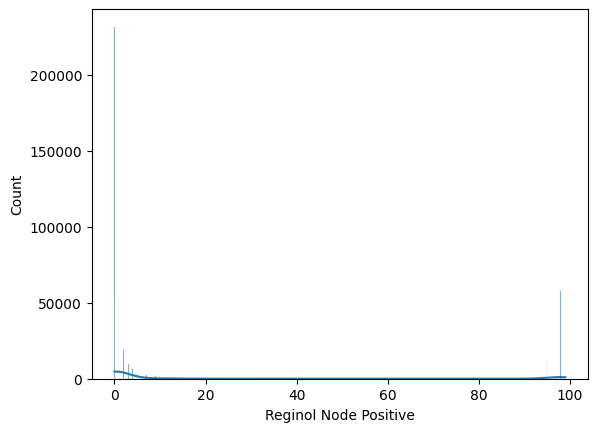

In [ ]:
sb.histplot(data_merged['Reginol Node Positive'], kde=True);

In [ ]:
data_merged.describe()

,Age,Regional Node Examined,Reginol Node Positive,Tumor Size,Survival Months,Unnamed: 3
count,416766.000000,416766.000000,416766.000000,416766.000000,416766.000000,0.0
mean,59.604699,8.907212,18.339970,85.198812,37.178131,NaN
std,13.596471,19.055526,37.019744,225.864894,23.705634,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,50.000000,1.000000,0.000000,12.000000,17.000000,NaN
50%,60.000000,3.000000,0.000000,21.000000,35.000000,NaN
75%,70.000000,8.000000,4.000000,45.000000,57.000000,NaN
max,85.000000,99.000000,99.000000,999.000000,107.000000,NaN


##Models Training for Target Class 1 (Tumor Stage)##

**Model 1:** Logistic Regression Multi Class

Logistic regression can be efficient with large datasets and is less computationally demanding

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

hyperparameters = {
    'C': 10,               # Regularization strength in inverse with the value of C, so when C increase the Regularization decrease and the training accuarcy might increase
    'penalty': 'l2',        # Regularization type Ridge >> add sum squares
    'solver': 'sag',      # Optimization algorithm >> extension of the stochastic gradient descent (SGD) (Good for large datasets, fast converge, )
    'max_iter': 1000,        # Maximum number of iterations (in this case it won't converge)
}


reg = LogisticRegression(**hyperparameters)

# Fit the model to the training data
reg.fit(X_train, y_train)

# Training accuracy
y_train_pred = reg.predict(X_train)
training_accuracy_log = accuracy_score(y_train, y_train_pred)
print('Training Accuracy using Logistic Regression Model: ', training_accuracy_log)

# Testing accuracy
y_pred = reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred)
print('Testing Accuracy using Logistic Regression Model: ', accuracy_log)

# Micro-averaged precision, recall, and F1-score
micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')
micro_f1_log = f1_score(y_test, y_pred, average='micro')

# Print the micro-averaged results
print('Micro Precision:', micro_precision)
print('Micro Recall:', micro_recall)
print('Micro F1-Score:', micro_f1_log)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy using Logistic Regression Model:  0.9315031398250473
Testing Accuracy using Logistic Regression Model:  0.9313764696472846
Micro Precision: 0.9313764696472846
Micro Recall: 0.9313764696472846
Micro F1-Score: 0.9313764696472846


In [ ]:
#########FRom the pervious trail, we should increase the number of itiertations so the model will converge


import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

hyperparameters = {
    'C': 10,
    'penalty': 'l2',
    'solver': 'sag',
    'max_iter': 1200,
}


reg = LogisticRegression(**hyperparameters)

# Fit the model to the training data
reg.fit(X_train, y_train)

# Training accuracy
y_train_pred = reg.predict(X_train)
training_accuracy_log = accuracy_score(y_train, y_train_pred)
print('Training Accuracy using Logistic Regression Model: ', training_accuracy_log)

# Testing accuracy
y_pred = reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred)
print('Testing Accuracy using Logistic Regression Model: ', accuracy_log)

# Micro-averaged precision, recall, and F1-score
micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')
micro_f1_log = f1_score(y_test, y_pred, average='micro')

# Print the micro-averaged results
print('Micro Precision:', micro_precision)
print('Micro Recall:', micro_recall)
print('Micro F1-Score:', micro_f1_log)

GridSearch Trial

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Create logistic regression model
logreg = LogisticRegression()

# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10,100],
    'penalty': ['l1', 'l2'],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'class_weight': ['balanced', None],
    'multi_class': ['ovr', 'multinomial'],
    'max_iter': [500, 1000, 2000]
}

# Perform grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Micro averaging is suitable when there is a class imbalance, meaning some classes have significantly more instances than others. It emphasizes the performance on the larger classes.

**Model 2:** Decision Tree for Tumor Stage

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score

# Assuming X_train, X_test, y_train, y_test are your training and testing data
tree_clf = DecisionTreeClassifier(criterion = "entropy",max_depth=6,random_state=42)
tree_clf.fit(X_train, y_train)

# Training accuracy
y_train_pred = tree_clf.predict(X_train)
training_accuracy_dtc = accuracy_score(y_train, y_train_pred)
print('Training Accuracy using Decision Tree Model: ', training_accuracy_dtc)

# Testing accuracy
y_pred = tree_clf.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred)
print('Testing Accuracy using Decision Tree Model: ', accuracy_dtc)

# Micro-averaged precision, recall, and F1-score
micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')
micro_f1_dtc = f1_score(y_test, y_pred, average='micro')

# Print the micro-averaged results
print('Micro Precision:', micro_precision)
print('Micro Recall:', micro_recall)
print('Micro F1-Score:', micro_f1_dtc)

Training Accuracy using Decision Tree Model:  0.9670626868127348
Testing Accuracy using Decision Tree Model:  0.9666959929616892
Micro Precision: 0.9666959929616892
Micro Recall: 0.9666959929616892
Micro F1-Score: 0.9666959929616892


Hyperparameter Tuning

In [ ]:
tree_clf = DecisionTreeClassifier(criterion = "entropy",max_depth=15,random_state=42)
tree_clf.fit(X_train, y_train)

# Training accuracy
y_train_pred = tree_clf.predict(X_train)
training_accuracy_dtc = accuracy_score(y_train, y_train_pred)
print('Training Accuracy using Decision Tree Model: ', training_accuracy_dtc)

# Testing accuracy
y_pred = tree_clf.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred)
print('Testing Accuracy using Decision Tree Model: ', accuracy_dtc)

# Micro-averaged precision, recall, and F1-score
micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')
micro_f1_dtc = f1_score(y_test, y_pred, average='micro')

# Print the micro-averaged results
print('Micro Precision:', micro_precision)
print('Micro Recall:', micro_recall)
print('Micro F1-Score:', micro_f1_dtc)

Training Accuracy using Decision Tree Model:  0.9955062110949626
Testing Accuracy using Decision Tree Model:  0.9919459329760857
Micro Precision: 0.9919459329760857
Micro Recall: 0.9919459329760857
Micro F1-Score: 0.9919459329760857


In [ ]:
tree_clf = DecisionTreeClassifier(criterion = "entropy",max_depth=3,random_state=42)
tree_clf.fit(X_train, y_train)

# Training accuracy
y_train_pred = tree_clf.predict(X_train)
training_accuracy_dtc = accuracy_score(y_train, y_train_pred)
print('Training Accuracy using Decision Tree Model: ', training_accuracy_dtc)

# Testing accuracy
y_pred = tree_clf.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred)
print('Testing Accuracy using Decision Tree Model: ', accuracy_dtc)

# Micro-averaged precision, recall, and F1-score
micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')
micro_f1_dtc = f1_score(y_test, y_pred, average='micro')

# Print the micro-averaged results
print('Micro Precision:', micro_precision)
print('Micro Recall:', micro_recall)
print('Micro F1-Score:', micro_f1_dtc)

Training Accuracy using Decision Tree Model:  0.854597992705734
Testing Accuracy using Decision Tree Model:  0.8546428857074302
Micro Precision: 0.8546428857074302
Micro Recall: 0.8546428857074302
Micro F1-Score: 0.8546428857074302


*Conclusion of Hyperparameter:* At Depth = 6 accuarcy is well accepted. At Depth= 15, this may show an overfitted model. At Depth= 3, this may show an underfitted model

**Model 3:** Naive Bayes for Tumor Stage

When alpha is very small, the model may become sensitive to rare features or outliers in the training data. It helps avoid zero probabilities for features not present in the training set.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

alpha_value = 0.5
nb_classifier = MultinomialNB(alpha=alpha_value)

# Train the model
nb_classifier.fit(X_train, y_train)

# Predictions on the training set
y_pred_train = nb_classifier.predict(X_train)
training_accuracy_nb = accuracy_score(y_train, y_pred_train)
print('Training Accuracy using Naive Bayes Model: ', training_accuracy_nb)

# Predictions on the testing set
y_pred_test = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_test)
print('Testing Accuracy using Naive Bayes Model: ', accuracy_nb)

# Evaluation metrics
precision = precision_score(y_test, y_pred_test, average='micro')
recall = recall_score(y_test, y_pred_test, average='micro')
f1_nb = f1_score(y_test, y_pred_test, average='micro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_nb)

Training Accuracy using Naive Bayes Model:  0.41111827131379053
Testing Accuracy using Naive Bayes Model:  0.4094457330240742
Precision: 0.4094457330240742
Recall: 0.4094457330240742
F1-Score: 0.4094457330240742


In [ ]:
alpha_value = 0.8   ##accuarcy decreased as the data is more generalized and smoothed
nb_classifier = MultinomialNB(alpha=alpha_value)

# Train the model
nb_classifier.fit(X_train, y_train)

# Predictions on the training set
y_pred_train = nb_classifier.predict(X_train)
training_accuracy_nb = accuracy_score(y_train, y_pred_train)
print('Training Accuracy using Naive Bayes Model: ', training_accuracy_nb)

# Predictions on the testing set
y_pred_test = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_test)
print('Testing Accuracy using Naive Bayes Model: ', accuracy_nb)

# Evaluation metrics
precision = precision_score(y_test, y_pred_test, average='micro')
recall = recall_score(y_test, y_pred_test, average='micro')
f1_nb = f1_score(y_test, y_pred_test, average='micro')

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_nb)

Training Accuracy using Naive Bayes Model:  0.40526023528121313
Testing Accuracy using Naive Bayes Model:  0.40335919379348956
Precision: 0.40335919379348956
Recall: 0.40335919379348956
F1-Score: 0.40335919379348956


This low accuarcy caused by some classes imbalance, which would be accepted in such a domain.\
Not suitable with Large datasets

**Model 5:** KNN For Tumor Stage

Small to Medium-Sized Datasets, Multi-Class Classification, Imbalanced Datasets

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


knn_classifier = KNeighborsClassifier(n_neighbors=50)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predictions
y_pred = knn_classifier.predict(X_train)
training_accuracy_knn = accuracy_score(y_train, y_pred)
print('Training Accuracy using KNN Model: ', training_accuracy_knn)


# Predictions
y_pred = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Testing Accuracy using KNN Model: ', accuracy_knn)



# Evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1_knn = f1_score(y_test, y_pred, average='micro')

print('Testing Accuracy using KNN Model: ', accuracy_knn)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_knn)

Training Accuracy using KNN Model:  0.7924082046782022
Testing Accuracy using KNN Model:  0.787946892745741
Testing Accuracy using KNN Model:  0.787946892745741
Precision: 0.787946892745741
Recall: 0.787946892745741
F1-Score: 0.7879468927457411


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


knn_classifier = KNeighborsClassifier(n_neighbors=100)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predictions
y_pred = knn_classifier.predict(X_train)
training_accuracy_knn = accuracy_score(y_train, y_pred)
print('Training Accuracy using KNN Model: ', training_accuracy_knn)


# Predictions
y_pred = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Testing Accuracy using KNN Model: ', accuracy_knn)



# Evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1_knn = f1_score(y_test, y_pred, average='micro')

print('Testing Accuracy using KNN Model: ', accuracy_knn)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_knn)

Training Accuracy using KNN Model:  0.7771546877999287
Testing Accuracy using KNN Model:  0.7765816204111013
Testing Accuracy using KNN Model:  0.7765816204111013
Precision: 0.7765816204111013
Recall: 0.7765816204111013
F1-Score: 0.7765816204111012


In [ ]:
knn_classifier = KNeighborsClassifier(n_neighbors=20)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predictions
y_pred = knn_classifier.predict(X_train)
training_accuracy_knn = accuracy_score(y_train, y_pred)
print('Training Accuracy using KNN Model: ', training_accuracy_knn)


# Predictions
y_pred = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Testing Accuracy using KNN Model: ', accuracy_knn)



# Evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1_knn = f1_score(y_test, y_pred, average='micro')

print('Testing Accuracy using KNN Model: ', accuracy_knn)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_knn)

Training Accuracy using KNN Model:  0.8246973714203448
Testing Accuracy using KNN Model:  0.8131583367324904
Testing Accuracy using KNN Model:  0.8131583367324904
Precision: 0.8131583367324904
Recall: 0.8131583367324904
F1-Score: 0.8131583367324904


**Conclusion from KNN tuning:** While increasing the neighbors, the accuarcy decreases.

Cross validation of the previous models

Whenever dataset is larger we would use smaller k-folds as there is enough data for each fold to be representative of the overall distribution.

In [ ]:
#Logistic regression
from sklearn.model_selection import cross_val_score
logistic_scores = cross_val_score(reg, X_train, y_train, cv=5)
print('Cross-Validation Scores:', logistic_scores)
print('Mean CV Score:', logistic_scores.mean())
#DCT
tree_clf = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('Cross-Validation Scores :', tree_clf)
print('Mean CV Score:', tree_clf.mean())
#Naive Bayes
nb_scores = cross_val_score(nb_classifier, X_train, y_train, cv=5)
print('Cross-Validation Scores :', nb_scores)
print('Mean CV Score:', nb_scores.mean())
#KNN
knn_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
print('Cross-Validation Scores :', knn_scores)
print('Mean CV Score:', knn_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.68182286 0.68860438 0.67189401 0.67835536 0.69856205]
Mean CV Score: 0.6838477322815022
Cross-Validation Scores : [0.99197916 0.99149913 0.99155055 0.99189333 0.99180763]
Mean CV Score: 0.9917459613033763
Cross-Validation Scores : [0.39348392 0.3969013  0.39330214 0.39323359 0.39153684]
Mean CV Score: 0.3936915574616552
Cross-Validation Scores : [0.7818777  0.77868614 0.78278232 0.78156546 0.78017722]
Mean CV Score: 0.7810177665425838


**Model 5:** ANN For Tumor Stage

Complex pattern detection: can handel large dataset

Can handel both categorical and numerical data with encoding

Handel high dimensional data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Assuming y_train contains your original string labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


# Assuming your target labels are y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Convert encoded labels to one-hot encoded format
y_train_multi_one_hot = to_categorical(y_train_encoded, num_classes=11)
y_test_multi_one_hot = to_categorical(y_test_encoded, num_classes=11)

# Model creation and compilation
model = Sequential()
model.add(Dense(128, input_dim=72, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))  # Output layer with 11 neurons for 11 classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Assuming X_train and X_test are your training and test data

# Training the model
history = model.fit(X_train, y_train_multi_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_test_multi_one_hot))

# Extracting training accuracies for all epochs
training_accuracies_ANN = history.history['accuracy']

# Print training accuracies for all epochs
for epoch, acc in enumerate(training_accuracies_ANN, 1):
    print(f"Epoch {epoch}: Training Accuracy: {acc}")

# Calculate average training accuracy
ANN_training_accuracy = sum(training_accuracies_ANN) / len(training_accuracies_ANN)
print(f"Average Training Accuracy across all epochs: {ANN_training_accuracy}")

# Evaluating the model on test data
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)  # Convert probabilities to class labels

# Calculate evaluation metrics
accuracy_ANN = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='micro')
recall = recall_score(y_test_encoded, y_pred, average='micro')
f1_ANN = f1_score(y_test_encoded, y_pred, average='micro')

# Print evaluation metrics
print('Accuracy:', accuracy_ANN)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_ANN)


Epoch 1/10
10420/10420 [==============================] - 46s 4ms/step - loss: 0.7297 - accuracy: 0.8045 - val_loss: 0.1648 - val_accuracy: 0.9441
Epoch 2/10
10420/10420 [==============================] - 36s 3ms/step - loss: 0.2460 - accuracy: 0.9136 - val_loss: 0.1382 - val_accuracy: 0.9502
Epoch 3/10
10420/10420 [==============================] - 36s 3ms/step - loss: 0.2131 - accuracy: 0.9264 - val_loss: 0.1108 - val_accuracy: 0.9575
Epoch 4/10
10420/10420 [==============================] - 36s 3ms/step - loss: 0.1983 - accuracy: 0.9320 - val_loss: 0.1164 - val_accuracy: 0.9571
Epoch 5/10
10420/10420 [==============================] - 38s 4ms/step - loss: 0.1912 - accuracy: 0.9344 - val_loss: 0.1149 - val_accuracy: 0.9528
Epoch 6/10
10420/10420 [==============================] - 37s 4ms/step - loss: 0.1805 - accuracy: 0.9370 - val_loss: 0.1102 - val_accuracy: 0.9575
Epoch 7/10
10420/10420 [==============================] - 37s 4ms/step - loss: 0.1748 - accuracy: 0.9393 - val_loss: 0

hyperparameter tuning

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Assuming y_train contains your original string labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)


# Assuming your target labels are y_train and y_test
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


# Convert encoded labels to one-hot encoded format
y_train_multi_one_hot = to_categorical(y_train_encoded, num_classes=11)
y_test_multi_one_hot = to_categorical(y_test_encoded, num_classes=11)

# Model creation and compilation
model = Sequential()
model.add(Dense(64, input_dim=72, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(11, activation='softmax'))  # Output layer with 11 neurons for 11 classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Assuming X_train and X_test are your training and test data

# Training the model
history = model.fit(X_train, y_train_multi_one_hot, epochs=10, batch_size=32, validation_data=(X_test, y_test_multi_one_hot))

# Extracting training accuracies for all epochs
training_accuracies = history.history['accuracy']

# Print training accuracies for all epochs
for epoch, acc in enumerate(training_accuracies, 1):
    print(f"Epoch {epoch}: Training Accuracy: {acc}")

# Calculate average training accuracy
training_accuracy = sum(training_accuracies) / len(training_accuracies)
print(f"Average Training Accuracy across all epochs: {training_accuracy}")

# Evaluating the model on test data
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)  # Convert probabilities to class labels

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='micro')
recall = recall_score(y_test_encoded, y_pred, average='micro')
f1 = f1_score(y_test_encoded, y_pred, average='micro')

# Print evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)


Epoch 1/10
10420/10420 [==============================] - 38s 4ms/step - loss: 0.5373 - accuracy: 0.8437 - val_loss: 0.1275 - val_accuracy: 0.9564
Epoch 2/10
10420/10420 [==============================] - 35s 3ms/step - loss: 0.1499 - accuracy: 0.9480 - val_loss: 0.1097 - val_accuracy: 0.9586
Epoch 3/10
10420/10420 [==============================] - 33s 3ms/step - loss: 0.1319 - accuracy: 0.9530 - val_loss: 0.1054 - val_accuracy: 0.9610
Epoch 4/10
10420/10420 [==============================] - 34s 3ms/step - loss: 0.1269 - accuracy: 0.9549 - val_loss: 0.1042 - val_accuracy: 0.9622
Epoch 5/10
10420/10420 [==============================] - 41s 4ms/step - loss: 0.1238 - accuracy: 0.9555 - val_loss: 0.1031 - val_accuracy: 0.9627
Epoch 6/10
10420/10420 [==============================] - 31s 3ms/step - loss: 0.1225 - accuracy: 0.9559 - val_loss: 0.1029 - val_accuracy: 0.9621
Epoch 7/10
10420/10420 [==============================] - 33s 3ms/step - loss: 0.1204 - accuracy: 0.9566 - val_loss: 0

dropout(0.8)->77.3 ,(0.5)->95.8,(0.2)->96.1




dense (128-64)->96.1 ,(64-32)->98.6




Cross validation ANN

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming your data is in DataFrame format
# Encoding target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded, num_classes=11)

# Define the number of splits for cross-validation
num_splits = 5  # Adjust the number of splits as needed

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Convert X to a NumPy array (if it's a DataFrame)
X = X.values if isinstance(X, pd.DataFrame) else X

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y_encoded), 1):
    print(f"Fold {fold}/{num_splits}")

    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y_one_hot[train_index], y_one_hot[test_index]

    # Model creation and compilation
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(11, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Training the model
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_test_fold, y_test_fold), verbose=1)

    # Predict on the test set
    y_pred_probs = model.predict(X_test_fold)
    y_pred = y_pred_probs.argmax(axis=1)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test_fold.argmax(axis=1), y_pred)
    precision = precision_score(y_test_fold.argmax(axis=1), y_pred, average='micro')
    recall = recall_score(y_test_fold.argmax(axis=1), y_pred, average='micro')
    f1 = f1_score(y_test_fold.argmax(axis=1), y_pred, average='micro')

    # Append metrics to respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Print metrics for this fold
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

# Print average evaluation metrics across all folds
print("\nAverage evaluation metrics across all folds:")
print(f"Average Accuracy: {sum(accuracy_list) / len(accuracy_list)}")
print(f"Average Precision: {sum(precision_list) / len(precision_list)}")
print(f"Average Recall: {sum(recall_list) / len(recall_list)}")
print(f"Average F1-Score: {sum(f1_list) / len(f1_list)}")


Fold 1/5
Epoch 1/10
10420/10420 [==============================] - 39s 4ms/step - loss: 0.7767 - accuracy: 0.7961 - val_loss: 0.1776 - val_accuracy: 0.9379
Epoch 2/10
10420/10420 [==============================] - 36s 3ms/step - loss: 0.2380 - accuracy: 0.9194 - val_loss: 0.1262 - val_accuracy: 0.9521
Epoch 3/10
10420/10420 [==============================] - 37s 4ms/step - loss: 0.1972 - accuracy: 0.9324 - val_loss: 0.1139 - val_accuracy: 0.9557
Epoch 4/10
10420/10420 [==============================] - 37s 4ms/step - loss: 0.1798 - accuracy: 0.9377 - val_loss: 0.1117 - val_accuracy: 0.9574
Epoch 5/10
10420/10420 [==============================] - 37s 4ms/step - loss: 0.1713 - accuracy: 0.9409 - val_loss: 0.1026 - val_accuracy: 0.9579
Epoch 6/10
10420/10420 [==============================] - 35s 3ms/step - loss: 0.1663 - accuracy: 0.9421 - val_loss: 0.1105 - val_accuracy: 0.9574
Epoch 7/10
10420/10420 [==============================] - 37s 4ms/step - loss: 0.1634 - accuracy: 0.9436 - va

XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode target variable 'y' into integer classes
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBoost classifier
model = XGBClassifier(objective='multi:softmax', num_class=11, seed=42)

# Training the model
model.fit(X_train, y_train_encoded)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Making predictions on the training set for training accuracy calculation
y_train_pred_XGBoost = model.predict(X_train)

# Calculate evaluation metrics for test set
accuracy_XGBoost = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='micro')
recall = recall_score(y_test_encoded, y_pred, average='micro')
f1_XGBoost = f1_score(y_test_encoded, y_pred, average='micro')

# Calculate training accuracy
accuracy_train_XGBoost = accuracy_score(y_train_encoded, y_train_pred_XGBoost)

# Print evaluation metrics
print('Test Accuracy:', accuracy_XGBoost)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-Score:', f1_XGBoost)
print('Training Accuracy:', accuracy_train_XGBoost)


Test Accuracy: 0.9930417256520383
Test Precision: 0.9930417256520383
Test Recall: 0.9930417256520383
Test F1-Score: 0.9930417256520383
Training Accuracy: 0.9971446738569698


Hyperparameters tuning

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode target variable 'y' into integer classes
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBoost classifier with regularization, gamma, colsample_bytree, subsample, and max_depth parameters
model = XGBClassifier(
    objective='multi:softmax',
    num_class=11,
    seed=42,
    reg_alpha=0.2,   # L1 regularization term on weights (default=0)
    reg_lambda=1,  # L2 regularization term on weights (default=1)
    gamma=0.1,       # Minimum loss reduction required to make further partition on leaf node (default=0)
    colsample_bytree=1,  # Fraction of features to be randomly sampled for each tree (default=1.0)
    subsample=1,    # Fraction of samples to be used for fitting the individual base learners (default=1.0)
    max_depth=4       # Maximum depth of a tree (default=6)
)

# Training the model
model.fit(X_train, y_train_encoded)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Making predictions on the training set for training accuracy calculation
y_train_pred = model.predict(X_train)

# Calculate evaluation metrics for test set
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='micro')
recall = recall_score(y_test_encoded, y_pred, average='micro')
f1 = f1_score(y_test_encoded, y_pred, average='micro')

# Calculate training accuracy
accuracy_train = accuracy_score(y_train_encoded, y_train_pred)

# Print evaluation metrics
print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-Score:', f1)
print('Training Accuracy:', accuracy_train)


Test Accuracy: 0.9936295798641936
Test Precision: 0.9936295798641936
Test Recall: 0.9936295798641936
Test F1-Score: 0.9936295798641936
Training Accuracy: 0.994688253572157


cross validation

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Assuming your data is in DataFrame format and 'X', 'y' are defined

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode target variable 'y' into integer classes
y_encoded = label_encoder.fit_transform(y)

# Initialize XGBoost classifier with multiclass objective for 11 classes
model = XGBClassifier(objective='multi:softmax', num_class=11, seed=42)

# Define the number of splits for cross-validation
num_splits = 5  # Adjust the number of splits as needed

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y_encoded), 1):
    print(f"Fold {fold}/{num_splits}")

    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y_encoded[train_index], y_encoded[test_index]

    # Training the model
    model.fit(X_train_fold, y_train_fold)

    # Making predictions on the test set
    y_pred = model.predict(X_test_fold)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred, average='micro')
    recall = recall_score(y_test_fold, y_pred, average='micro')
    f1 = f1_score(y_test_fold, y_pred, average='micro')

    # Append metrics to respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Print metrics for this fold
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

# Print average evaluation metrics across all folds
print("\nAverage evaluation metrics across all folds:")
print(f"Average Accuracy: {sum(accuracy_list) / len(accuracy_list)}")
print(f"Average Precision: {sum(precision_list) / len(precision_list)}")
print(f"Average Recall: {sum(recall_list) / len(recall_list)}")
print(f"Average F1-Score: {sum(f1_list) / len(f1_list)}")


Fold 1/5
Accuracy: 0.9928497732562325, Precision: 0.9928497732562325, Recall: 0.9928497732562325, F1-Score: 0.9928497732562325
Fold 2/5
Accuracy: 0.9930776336784519, Precision: 0.9930776336784519, Recall: 0.9930776336784519, F1-Score: 0.9930776336784519
Fold 3/5
Accuracy: 0.993329574220484, Precision: 0.993329574220484, Recall: 0.993329574220484, F1-Score: 0.993329574220484
Fold 4/5
Accuracy: 0.9931256223531246, Precision: 0.9931256223531246, Recall: 0.9931256223531246, F1-Score: 0.9931256223531246
Fold 5/5
Accuracy: 0.9931856081964656, Precision: 0.9931856081964656, Recall: 0.9931856081964656, F1-Score: 0.9931856081964656

Average evaluation metrics across all folds:
Average Accuracy: 0.9931136423409516
Average Precision: 0.9931136423409516
Average Recall: 0.9931136423409516
Average F1-Score: 0.9931136423409516


## Evaluation for Target Class 1##

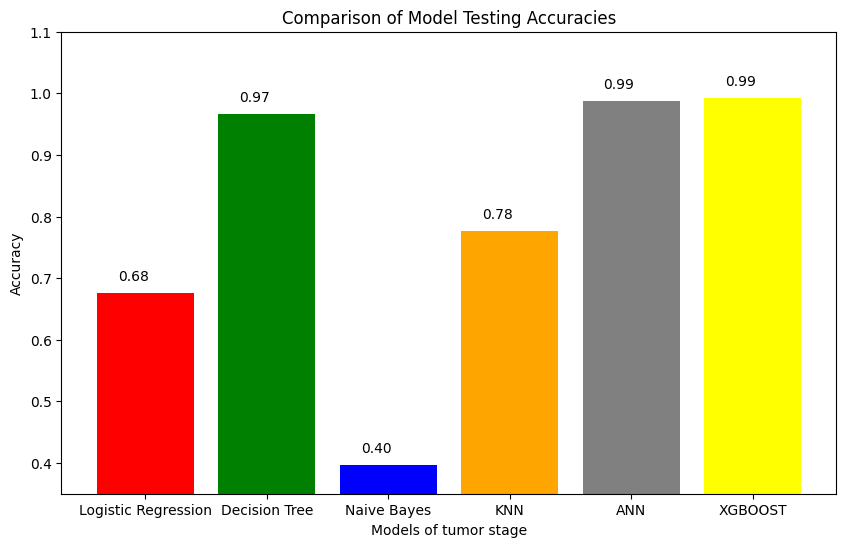

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have computed accuracies for different models
model_names = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'KNN','ANN','XGBOOST']
accuracies = [accuracy_log, accuracy_dtc, accuracy_nb, accuracy_knn,accuracy_ANN,accuracy_XGBoost]

# Assigning colors to each model
colors = ['red', 'green', 'blue', 'orange','grey','yellow']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=colors)
plt.title('Comparison of Model Testing Accuracies')
plt.xlabel('Models of tumor stage')
plt.ylabel('Accuracy')
plt.ylim(0.35, 1.1)  # Adjust the y-axis limits if needed

# Adding values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{accuracy:.2f}', ha='center', color='black')

plt.show()

##Target Class 2 (Status)##

In [ ]:
#In case you are trying TARGET CLASS 2


X = data_merged.drop('Status',axis=1)
y = data_merged['Status']

In [ ]:
categoryStrFeatures = [col for col in data_merged.columns if data_merged[col].dtypes == 'O']
categoryStrFeatures

['Race ',
 'Marital Status',
 'T Stage ',
 'N Stage',
 'Tumor_stage',
 'Grade',
 'A Stage',
 'Estrogen Status',
 'Progesterone Status',
 'Status']

In [ ]:
X= pd.get_dummies(X)
X

,Age,Regional Node Examined,Reginol Node Positive,Tumor Size,Survival Months,Race _Black,Race _Other,Race _Unknown,Race _White,Marital Status_Divorced,...,A Stage_Regional,A Stage_Unstaged,Estrogen Status_Borderline,Estrogen Status_Negative,Estrogen Status_Positive,Estrogen Status_Unknown,Progesterone Status_Borderline,Progesterone Status_Negative,Progesterone Status_Positive,Progesterone Status_Unknown
0,60,9,0,27.0,62.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,60,0,98,25.0,80.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,85,0,98,6.0,73.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,60,98,0,999.0,4.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,80,11,6,70.0,31.0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450825,52,19,1,10.0,107.0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
450826,53,13,5,9.0,107.0,0,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
450827,53,4,2,9.0,107.0,0,0,0,1,1,...,1,0,0,1,0,0,0,1,0,0
450828,60,14,2,9.0,107.0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

Logistic Regression for Status class

In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

hyperparameters = {
    'C': 10,               # Regularization strength in inverse with the value of C, so when C increase the Regularization decrease and the training accuarcy might increase
    'penalty': 'l2',        # Regularization type Ridge >> add sum squares
    'solver': 'sag',      # Optimization algorithm >> extension of the stochastic gradient descent (SGD) (Good for large datasets, fast converge, )
    'max_iter': 500,        # Maximum number of iterations (in this case it won't converge)
}


reg = LogisticRegression(**hyperparameters)

# Fit the model to the training data
reg.fit(X_train, y_train)

# Training accuracy
y_train_pred = reg.predict(X_train)
training_accuracy_log = accuracy_score(y_train, y_train_pred)
print('Training Accuracy using Logistic Regression Model: ', training_accuracy_log)

# Testing accuracy
y_pred = reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred)
print('Testing Accuracy using Logistic Regression Model: ', accuracy_log)

# Micro-averaged precision, recall, and F1-score
micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')
micro_f1_log = f1_score(y_test, y_pred, average='micro')

# Print the micro-averaged results
print('Micro Precision:', micro_precision)
print('Micro Recall:', micro_recall)
print('Micro F1-Score:', micro_f1_log)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Training Accuracy using Logistic Regression Model:  0.8908053856911728
Testing Accuracy using Logistic Regression Model:  0.8912421018955451
Micro Precision: 0.8912421018955451
Micro Recall: 0.8912421018955451
Micro F1-Score: 0.8912421018955451


In [ ]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score

# Assuming X_train, X_test, y_train, y_test are your training and testing data
reg = LogisticRegression()
reg.fit(X_train, y_train)

# Training accuracy
y_train_pred = reg.predict(X_train)
training_accuracy_log = accuracy_score(y_train, y_train_pred)
print('Training Accuracy using Logistic Regression Model: ', training_accuracy_log)

# Testing accuracy
y_pred= reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred)
print('Testing Accuracy using Logistic Regression Model: ', accuracy_log)

# Micro-averaged precision, recall, and F1-score
micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')
micro_f1_log = f1_score(y_test, y_pred, average='micro')

# Print the micro-averaged results
print('Micro Precision:', micro_precision)
print('Micro Recall:', micro_recall)
print('Micro F1-Score:', micro_f1_log)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy using Logistic Regression Model:  0.8901301176406066
Testing Accuracy using Logistic Regression Model:  0.8900263936655203
Micro Precision: 0.8900263936655203
Micro Recall: 0.8900263936655203
Micro F1-Score: 0.8900263936655202


DTC for Target Class Status

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score

# Assuming X_train, X_test, y_train, y_test are your training and testing data
tree_clf = DecisionTreeClassifier(criterion = "entropy",max_depth=6,random_state=42)
tree_clf.fit(X_train, y_train)

# Training accuracy
y_train_pred = tree_clf.predict(X_train)
training_accuracy_dtc = accuracy_score(y_train, y_train_pred)
print('Training Accuracy using Decision Tree Model: ', training_accuracy_dtc)

# Testing accuracy
y_pred = tree_clf.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred)
print('Testing Accuracy using Decision Tree Model: ', accuracy_dtc)

# Micro-averaged precision, recall, and F1-score
micro_precision = precision_score(y_test, y_pred, average='micro')
micro_recall = recall_score(y_test, y_pred, average='micro')
micro_f1_dtc = f1_score(y_test, y_pred, average='micro')

# Print the micro-averaged results
print('Micro Precision:', micro_precision)
print('Micro Recall:', micro_recall)
print('Micro F1-Score:', micro_f1_dtc)

Training Accuracy using Decision Tree Model:  0.8897324978747909
Testing Accuracy using Decision Tree Model:  0.8888986643205631
Micro Precision: 0.8888986643205631
Micro Recall: 0.8888986643205631
Micro F1-Score: 0.8888986643205631


Naive Bayes for Target Class Status >>> Without scaling

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target matrices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Multinomial Naive Bayes model
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)

y_pred = nb_classifier.predict(X_train)
training_accuracy_nb = accuracy_score(y_train, y_pred)
print('Training Accuracy using Naive Bayes Model: ', training_accuracy_nb)

# Predictions
y_pred = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred)
print('Testing Accuracy using Naive Bayes Model: ', accuracy_nb)



# Evaluation metrics
accuracy_nb = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')  # Adjust 'micro' or 'macro' as needed
recall = recall_score(y_test, y_pred, average='micro')  # Adjust 'micro' or 'macro' as needed
f1_nb = f1_score(y_test, y_pred, average='micro')  # Adjust 'micro' or 'macro' as needed

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_nb)

Training Accuracy using Naive Bayes Model:  0.8001138015191818
Testing Accuracy using Naive Bayes Model:  0.7992561785171559
Precision: 0.7992561785171559
Recall: 0.7992561785171559
F1-Score: 0.7992561785171559


KNN with Target Class Status

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

# Assuming X and y are your feature and target matrices
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a KNN classifier with, for example, k=5 (adjust as needed)
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_classifier.fit(X_train, y_train)

# Predictions
y_pred = knn_classifier.predict(X_train)
training_accuracy_knn = accuracy_score(y_train, y_pred)
print('Training Accuracy using KNN Model: ', training_accuracy_knn)


# Predictions
y_pred = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
print('Testing Accuracy using KNN Model: ', accuracy_knn)



# Evaluation metrics
accuracy_knn = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')  # Adjust 'micro' or 'macro' as needed
recall = recall_score(y_test, y_pred, average='micro')  # Adjust 'micro' or 'macro' as needed
f1_knn = f1_score(y_test, y_pred, average='micro')  # Adjust 'micro' or 'macro' as needed

print('Testing Accuracy using KNN Model: ', accuracy_knn)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_knn)

Training Accuracy using KNN Model:  0.9076185318232923
Testing Accuracy using KNN Model:  0.8808286011357275
Testing Accuracy using KNN Model:  0.8808286011357275
Precision: 0.8808286011357275
Recall: 0.8808286011357275
F1-Score: 0.8808286011357275


ANN for Target class Status

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Assuming y_train contains your original string labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Model creation and compilation
model = Sequential()
model.add(Dense(128, input_dim=81, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Assuming X_train and X_test are your training and test data

# Training the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Extracting training accuracies for all epochs
training_accuracies_ANN = history.history['accuracy']

# Print training accuracies for all epochs
for epoch, acc in enumerate(training_accuracies_ANN, 1):
    print(f"Epoch {epoch}: Training Accuracy: {acc}")

# Calculate average training accuracy
ANN_training_accuracy = sum(training_accuracies_ANN) / len(training_accuracies_ANN)
print(f"Average Training Accuracy across all epochs: {ANN_training_accuracy}")

# Evaluating the model on test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to class labels (0 or 1)

# Calculate evaluation metrics
accuracy_ANN = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1_ANN = f1_score(y_test_encoded, y_pred)

# Print evaluation metrics
print('Accuracy:', accuracy_ANN)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_ANN)


Epoch 1/10
9117/9117 [==============================] - 54s 6ms/step - loss: 0.3571 - accuracy: 0.8756 - val_loss: 0.2834 - val_accuracy: 0.8902
Epoch 2/10
9117/9117 [==============================] - 69s 8ms/step - loss: 0.2873 - accuracy: 0.8879 - val_loss: 0.2734 - val_accuracy: 0.8920
Epoch 3/10
9117/9117 [==============================] - 38s 4ms/step - loss: 0.2829 - accuracy: 0.8893 - val_loss: 0.2719 - val_accuracy: 0.8926
Epoch 4/10
9117/9117 [==============================] - 39s 4ms/step - loss: 0.2812 - accuracy: 0.8900 - val_loss: 0.2727 - val_accuracy: 0.8909
Epoch 5/10
9117/9117 [==============================] - 37s 4ms/step - loss: 0.2803 - accuracy: 0.8906 - val_loss: 0.2739 - val_accuracy: 0.8935
Epoch 6/10
9117/9117 [==============================] - 36s 4ms/step - loss: 0.2790 - accuracy: 0.8910 - val_loss: 0.2740 - val_accuracy: 0.8907
Epoch 7/10
9117/9117 [==============================] - 38s 4ms/step - loss: 0.2783 - accuracy: 0.8910 - val_loss: 0.2784 - val_ac

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Assuming y_train contains your original string labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Model creation and compilation
model = Sequential()
model.add(Dense(64, input_dim=81, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer with 1 neuron for binary classification
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Assuming X_train and X_test are your training and test data

# Training the model
history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_data=(X_test, y_test_encoded))

# Extracting training accuracies for all epochs
training_accuracies_ANN = history.history['accuracy']

# Print training accuracies for all epochs
for epoch, acc in enumerate(training_accuracies_ANN, 1):
    print(f"Epoch {epoch}: Training Accuracy: {acc}")

# Calculate average training accuracy
ANN_training_accuracy = sum(training_accuracies_ANN) / len(training_accuracies_ANN)
print(f"Average Training Accuracy across all epochs: {ANN_training_accuracy}")

# Evaluating the model on test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # Convert probabilities to class labels (0 or 1)

# Calculate evaluation metrics
accuracy_ANN = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred)
recall = recall_score(y_test_encoded, y_pred)
f1_ANN = f1_score(y_test_encoded, y_pred)

# Print evaluation metrics
print('Accuracy:', accuracy_ANN)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1_ANN)


Epoch 1/10
9117/9117 [==============================] - 38s 4ms/step - loss: 0.4930 - accuracy: 0.8614 - val_loss: 0.2975 - val_accuracy: 0.8747
Epoch 2/10
9117/9117 [==============================] - 37s 4ms/step - loss: 0.3027 - accuracy: 0.8833 - val_loss: 0.2836 - val_accuracy: 0.8885
Epoch 3/10
9117/9117 [==============================] - 36s 4ms/step - loss: 0.2961 - accuracy: 0.8854 - val_loss: 0.2798 - val_accuracy: 0.8895
Epoch 4/10
9117/9117 [==============================] - 35s 4ms/step - loss: 0.2932 - accuracy: 0.8866 - val_loss: 0.2838 - val_accuracy: 0.8844
Epoch 5/10
9117/9117 [==============================] - 39s 4ms/step - loss: 0.2924 - accuracy: 0.8870 - val_loss: 0.2841 - val_accuracy: 0.8872
Epoch 6/10
9117/9117 [==============================] - 37s 4ms/step - loss: 0.2911 - accuracy: 0.8870 - val_loss: 0.2751 - val_accuracy: 0.8920
Epoch 7/10
9117/9117 [==============================] - 37s 4ms/step - loss: 0.2910 - accuracy: 0.8874 - val_loss: 0.2791 - val_ac

ANN cross validation

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming your data is in DataFrame format
# Encoding target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Define the number of splits for cross-validation
num_splits = 5  # Adjust the number of splits as needed

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Convert X to a NumPy array (if it's a DataFrame)
X = X.values if isinstance(X, pd.DataFrame) else X

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y_encoded), 1):
    print(f"Fold {fold}/{num_splits}")

    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y_encoded[train_index], y_encoded[test_index]

    # Model creation and compilation for binary classification
    model = Sequential()
    model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Training the model
    history = model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_test_fold, y_test_fold), verbose=1)

    # Predict on the test set
    y_pred_probs = model.predict(X_test_fold)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred)
    recall = recall_score(y_test_fold, y_pred)
    f1 = f1_score(y_test_fold, y_pred)

    # Append metrics to respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Print metrics for this fold
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

# Print average evaluation metrics across all folds
print("\nAverage evaluation metrics across all folds:")
print(f"Average Accuracy: {sum(accuracy_list) / len(accuracy_list)}")
print(f"Average Precision: {sum(precision_list) / len(precision_list)}")
print(f"Average Recall: {sum(recall_list) / len(recall_list)}")
print(f"Average F1-Score: {sum(f1_list) / len(f1_list)}")


Fold 1/5
Epoch 1/10
10420/10420 [==============================] - 34s 3ms/step - loss: 0.4268 - accuracy: 0.8672 - val_loss: 0.2901 - val_accuracy: 0.8815
Epoch 2/10
10420/10420 [==============================] - 32s 3ms/step - loss: 0.2961 - accuracy: 0.8845 - val_loss: 0.2777 - val_accuracy: 0.8913
Epoch 3/10
10420/10420 [==============================] - 30s 3ms/step - loss: 0.2911 - accuracy: 0.8866 - val_loss: 0.2755 - val_accuracy: 0.8918
Epoch 4/10
10420/10420 [==============================] - 37s 4ms/step - loss: 0.2886 - accuracy: 0.8876 - val_loss: 0.2774 - val_accuracy: 0.8904
Epoch 5/10
10420/10420 [==============================] - 33s 3ms/step - loss: 0.2875 - accuracy: 0.8877 - val_loss: 0.2748 - val_accuracy: 0.8921
Epoch 6/10
10420/10420 [==============================] - 32s 3ms/step - loss: 0.2864 - accuracy: 0.8883 - val_loss: 0.2755 - val_accuracy: 0.8899
Epoch 7/10
10420/10420 [==============================] - 34s 3ms/step - loss: 0.2861 - accuracy: 0.8886 - va

XGBoost

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Assuming your data is in DataFrame format
# Splitting the data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode target variable 'y' into integer classes
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBoost classifier with binary logistic objective for two classes
model = XGBClassifier(objective='binary:logistic', seed=42)

# Training the model
model.fit(X_train, y_train_encoded)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Making predictions on the training set for training accuracy calculation
y_train_pred_XGBoost = model.predict(X_train)

# Calculate evaluation metrics for test set
accuracy_XGBoost = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='micro')
recall = recall_score(y_test_encoded, y_pred, average='micro')
f1_XGBoost = f1_score(y_test_encoded, y_pred, average='micro')

# Calculate training accuracy
accuracy_train_XGBoost = accuracy_score(y_train_encoded, y_train_pred_XGBoost)

# Print evaluation metrics
print('Test Accuracy:', accuracy_XGBoost)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-Score:', f1_XGBoost)
print('Training Accuracy:', accuracy_train_XGBoost)


Test Accuracy: 0.8981124530112773
Test Precision: 0.8981124530112773
Test Recall: 0.8981124530112773
Test F1-Score: 0.8981124530112773
Training Accuracy: 0.9052225299585926


hyperparameter tuning

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Assuming your data is in DataFrame format and loaded as X and y
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode target variable 'y' into integer classes
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize XGBoost classifier with sigmoid objective for binary classification
model = XGBClassifier(
    objective='binary:logistic',  # Sigmoid (logistic) objective function for binary classification
    seed=42,                       # Seed value for random number generation

    reg_alpha=0.3,                 # L1 regularization term on weights (default=0)
    reg_lambda=1,                  # L2 regularization term on weights (default=1)
    gamma=0.2,                     # Minimum loss reduction required to make further partition on leaf node (default=0)
    colsample_bytree=0.8,            # Fraction of features to be randomly sampled for each tree (default=1.0)
    subsample=1,                   # Fraction of samples to be used for fitting the individual base learners (default=1.0)
    max_depth=6                    # Maximum depth of a tree (default=6)
)

# Training the model
model.fit(X_train, y_train_encoded)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Making predictions on the training set for training accuracy calculation
y_train_pred = model.predict(X_train)

# Calculate evaluation metrics for test set
accuracy = accuracy_score(y_test_encoded, y_pred)
precision = precision_score(y_test_encoded, y_pred, average='micro')
recall = recall_score(y_test_encoded, y_pred, average='micro')
f1 = f1_score(y_test_encoded, y_pred, average='micro')

# Calculate training accuracy
accuracy_train = accuracy_score(y_train_encoded, y_train_pred)

# Print evaluation metrics
print('Test Accuracy:', accuracy)
print('Test Precision:', precision)
print('Test Recall:', recall)
print('Test F1-Score:', f1)
print('Training Accuracy:', accuracy_train)


Test Accuracy: 0.8999928017851573
Test Precision: 0.8999928017851573
Test Recall: 0.8999928017851573
Test F1-Score: 0.8999928017851573
Training Accuracy: 0.9043855650066585


Cross-Validation

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Assuming your data is in DataFrame format and 'X', 'y' are defined

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode target variable 'y' into integer classes
y_encoded = label_encoder.fit_transform(y)

# Initialize XGBoost classifier with binary logistic objective for two classes
model = XGBClassifier(objective='binary:logistic', seed=42)

# Define the number of splits for cross-validation
num_splits = 5  # Adjust the number of splits as needed

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=num_splits, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for each fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

# Perform cross-validation
for fold, (train_index, test_index) in enumerate(skf.split(X, y_encoded), 1):
    print(f"Fold {fold}/{num_splits}")

    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y_encoded[train_index], y_encoded[test_index]

    # Training the model
    model.fit(X_train_fold, y_train_fold)

    # Making predictions on the test set
    y_pred = model.predict(X_test_fold)

    # Calculate evaluation metrics for this fold
    accuracy = accuracy_score(y_test_fold, y_pred)
    precision = precision_score(y_test_fold, y_pred, average='micro')
    recall = recall_score(y_test_fold, y_pred, average='micro')
    f1 = f1_score(y_test_fold, y_pred, average='micro')

    # Append metrics to respective lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Print metrics for this fold
    print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-Score: {f1}")

# Print average evaluation metrics across all folds
print("\nAverage evaluation metrics across all folds:")
print(f"Average Accuracy: {sum(accuracy_list) / len(accuracy_list)}")
print(f"Average Precision: {sum(precision_list) / len(precision_list)}")
print(f"Average Recall: {sum(recall_list) / len(recall_list)}")
print(f"Average F1-Score: {sum(f1_list) / len(f1_list)}")


Fold 1/5
Accuracy: 0.898949060632963, Precision: 0.898949060632963, Recall: 0.898949060632963, F1-Score: 0.898949060632963
Fold 2/5
Accuracy: 0.8991038115004859, Precision: 0.8991038115004859, Recall: 0.8991038115004859, F1-Score: 0.8991038115004859
Fold 3/5
Accuracy: 0.8988278766211174, Precision: 0.8988278766211174, Recall: 0.8988278766211174, F1-Score: 0.8988278766211174
Fold 4/5
Accuracy: 0.8991278058378223, Precision: 0.8991278058378223, Recall: 0.8991278058378223, F1-Score: 0.8991278058378223
Fold 5/5
Accuracy: 0.8982880040310487, Precision: 0.8982880040310487, Recall: 0.8982880040310487, F1-Score: 0.8982880040310487

Average evaluation metrics across all folds:
Average Accuracy: 0.8988593117246874
Average Precision: 0.8988593117246874
Average Recall: 0.8988593117246874
Average F1-Score: 0.8988593117246874


##Models Evaluation Comments for Target class 2##

Testing Accuarcy Scores

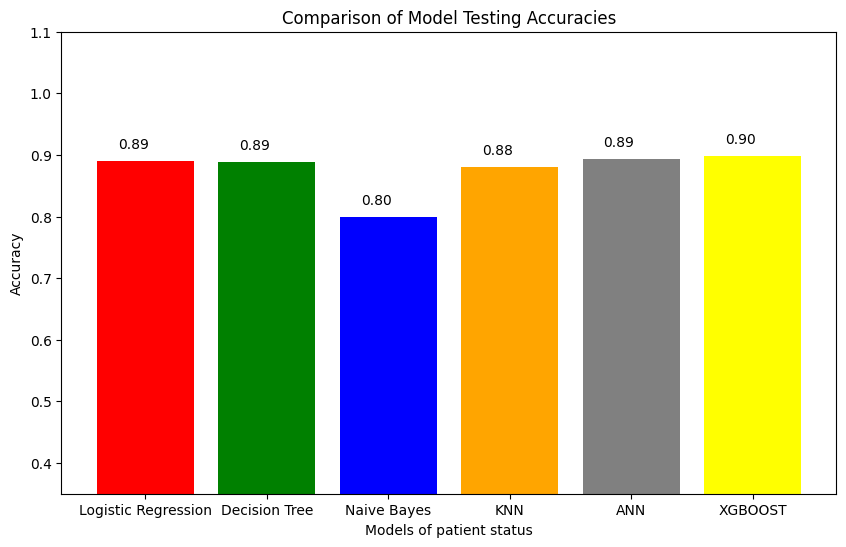

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have computed accuracies for different models
model_names = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'KNN','ANN','XGBOOST']
accuracies = [accuracy_log, accuracy_dtc, accuracy_nb, accuracy_knn,accuracy_ANN,accuracy_XGBoost]

# Assigning colors to each model
colors = ['red', 'green', 'blue', 'orange','grey','yellow']

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=colors)
plt.title('Comparison of Model Testing Accuracies')
plt.xlabel('Models of patient status')
plt.ylabel('Accuracy')
plt.ylim(0.35, 1.1)  # Adjust the y-axis limits if needed

# Adding values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{accuracy:.2f}', ha='center', color='black')

plt.show()

F1 scores

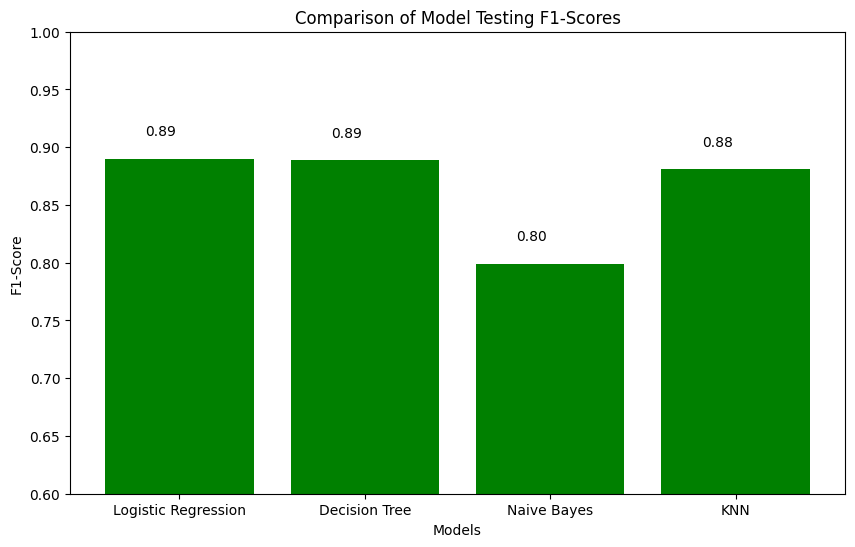

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have computed F1-scores for different models
model_names = ['Logistic Regression', 'Decision Tree', 'Naive Bayes', 'KNN']
f1_scores = [micro_f1_log, micro_f1_dtc, f1_nb, f1_knn]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, f1_scores, color='green')
plt.title('Comparison of Model Testing F1-Scores')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.ylim(0.6, 1)  # Adjust the y-axis limits if needed

# Adding values on top of each bar
for bar, f1_score in zip(bars, f1_scores):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{f1_score:.2f}', ha='center', color='black')

plt.show()

Cross Validation second target class

In [ ]:
#Logistic regression
from sklearn.model_selection import cross_val_score
logistic_scores = cross_val_score(reg, X_train, y_train, cv=5)
print('Cross-Validation Scores:', logistic_scores)
print('Mean CV Score:', logistic_scores.mean())
#DCT
tree_clf = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('Cross-Validation Scores :', tree_clf)
print('Mean CV Score:', tree_clf.mean())
#Naive Bayes
nb_scores = cross_val_score(nb_classifier, X_train, y_train, cv=5)
print('Cross-Validation Scores :', nb_scores)
print('Mean CV Score:', nb_scores.mean())
#KNN
knn_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
print('Cross-Validation Scores :', knn_scores)
print('Mean CV Score:', knn_scores.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.88935353 0.89087699 0.89012289 0.88978011 0.88930022]
Mean CV Score: 0.8898867487496049
Cross-Validation Scores : [0.88935353 0.88912883 0.88928308 0.88928308 0.88909455]
Mean CV Score: 0.8892286172261334
Cross-Validation Scores : [0.79894769 0.79923561 0.80288618 0.7997155  0.7997155 ]
Mean CV Score: 0.8001000944429254
Cross-Validation Scores : [0.88167546 0.88088505 0.8821876  0.88071366 0.88035375]
Mean CV Score: 0.8811631046138979


##Conclusion##